# İstanbul Kadı Sicillerinde Sufiler Bulmak: Yapay Zekâ Destekli Bir Araştırma

In [152]:
import pandas as pd
import os
import pathlib as Path
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import ast
import re
from collections import Counter


In [21]:
project_root = '/Users/ahmetyusufyuksek/Documents/GitHub/Sufism-and-Urban-Religiosity'
file_path = os.path.join(project_root, 'data', 'sicil_records.csv')
df = pd.read_csv(file_path)

In [22]:
df['case_text_summary'] = "Summary: " + df['case_summary'].astype(str) + "\n" + "Case: " + df['case_text'].astype(str)
df.head()

,court_title,sicil_number,sicil_date,date_hijri,date_miladi,case_text,case_summary,case_number,id,case_text_summary
0,Adalar Mahkemesi,1,H. 1178-1184 / M. 1764-1771),H. 1178-1184,M. 1764-1771),"['[İç Kapak]', 'Mûcebince amel oluna deyü buyr...",117[8] ilâ 1184 Adalar Hücec,Hüküm no:,1,Summary: 117[8] ilâ 1184 Adalar Hücec\nCase: [...
1,Adalar Mahkemesi,1,H. 1178-1184 / M. 1764-1771),H. 1178-1184,M. 1764-1771),['Kasab Veli Beşe kanadârı Mumço? nâm zimmîye ...,Kasap Veli’nin Mumço’ya kefil olduğu,Hüküm no: 1,2,Summary: Kasap Veli’nin Mumço’ya kefil olduğu\...
2,Adalar Mahkemesi,1,H. 1178-1184 / M. 1764-1771),H. 1178-1184,M. 1764-1771),['Bundan akdem hâlik olan Esteban v. Kirkor v....,Ölen Esteban’ın terekesinin varislerine taksim...,Hüküm no: 2,3,Summary: Ölen Esteban’ın terekesinin varisleri...
3,Adalar Mahkemesi,1,H. 1178-1184 / M. 1764-1771),H. 1178-1184,M. 1764-1771),['Culûs-ı Sultân Mustafa Han b. es-Sultân Abdü...,Sultan Mustafa Han’ın tahta çıkış tarihinin no...,Hüküm no: 3,4,Summary: Sultan Mustafa Han’ın tahta çıkış tar...
4,Adalar Mahkemesi,1,H. 1178-1184 / M. 1764-1771),H. 1178-1184,M. 1764-1771),['Devletlü inâyetlü merhametlü efendim sultânı...,Yarım kalan bir arzuhal kaydı,Hüküm no: 4,5,Summary: Yarım kalan bir arzuhal kaydı\nCase: ...


In [23]:
# Farklı mahkeme sayısı
num_courts = df['court_title'].nunique()

# Her mahkeme için sicil sayısı (court_title ve sicil_number birleştirilerek)
registers_per_court = df.groupby('court_title')['sicil_number'].nunique()

# Her mahkeme için dava girişlerinin sayısı
case_entries_per_court = df.groupby('court_title').size()

# Toplam dava sayısı
total_cases = case_entries_per_court.sum()

# Sonuçları göster
print(f"Farklı mahkeme sayısı: {num_courts}")
print("Her mahkeme için sicil sayısı:")
print(registers_per_court)
print("Her mahkeme için dava girişlerinin sayısı:")
print(case_entries_per_court)
print(f"Toplam dava sayısı: {total_cases}")
total_registers = registers_per_court.sum()
print(f"Toplam sicil sayısı: {total_registers}")

Farklı mahkeme sayısı: 24
Her mahkeme için sicil sayısı:
court_title
Adalar Mahkemesi                    1
Ahi Çelebi Mahkemesi                1
Anadolu Sadareti Mahkemesi          1
Anadolu Sadâreti Mahkemesi          1
Bab Mahkemesi                      10
Balat Mahkemesi                     2
Beşiktaş Mahkemesi                  2
Davud Paşa Mahkemesi                1
Evkaf Muhasebesi                    1
Evkaf-ı Hümâyûn Mahkemesi           1
Evkaf-ı Hümâyûn Müfettişliği        1
Eyüb Mahkemesi (Havass-ı Refia)     8
Eyüp Mahkemesi                      4
Galata Mahkemesi                   12
Hasköy Mahkemesi                    3
Kartal Mahkemesi                    1
Kısmet-i Askeriye Mahkemesi         2
Mahfel-i Şer‘iyyât Mahkemesi        1
Mahmudpaşa Mahkemesi                1
Rumeli Sadareti Mahkemesi           3
Rumeli Sadâreti Mahkemesi           5
Tophane Mahkemesi                   1
Üsküdar Mahkemesi                  13
İstanbul Mahkemesi                 24
Name: sicil_number,

In [24]:
# Perform the specified changes in the DataFrame
df.loc[df['court_title'] == 'Evkaf Muhasebesi1', 'court_title'] = 'Evkaf Muhasebesi'
df.loc[df['court_title'] == 'Eyüb', 'court_title'] = 'Eyüp'
df.loc[df['court_title'] == 'Rumeli Sadâreti', 'court_title'] = 'Rumeli Sadareti'
df.loc[df['court_title'] == 'Evkaf-ı Hümâyûn', 'court_title'] = 'Evkaf Mahkemesi'
df.loc[df['court_title'] == 'Evkaf-ı HümâyûnMüfettişliği', 'court_title'] = 'Evkaf Müfettişliği'
df.loc[df['court_title'] == 'Evkaf Müfettişliği', 'sicil_number'] = '1'  # Changed '1' to 1
df.loc[df['court_title'] == 'Evkaf Muhasebesi', 'sicil_number'] = '1'   # Changed '1' to 1
df.loc[df['court_title'] == 'Evkaf Mahkemesi', 'sicil_number'] = '673'  # Changed '673' to 673

/var/folders/54/1bt1zb4n7h7grgv919nm_0c00000gn/T/ipykernel_7393/3086381910.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['court_title'] == 'Evkaf Müfettişliği', 'sicil_number'] = '1'  # Changed '1' to 1


/var/folders/54/1bt1zb4n7h7grgv919nm_0c00000gn/T/ipykernel_7393/3507041528.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  periodic_register_counts = df.groupby('period')['sicil_number'].nunique()


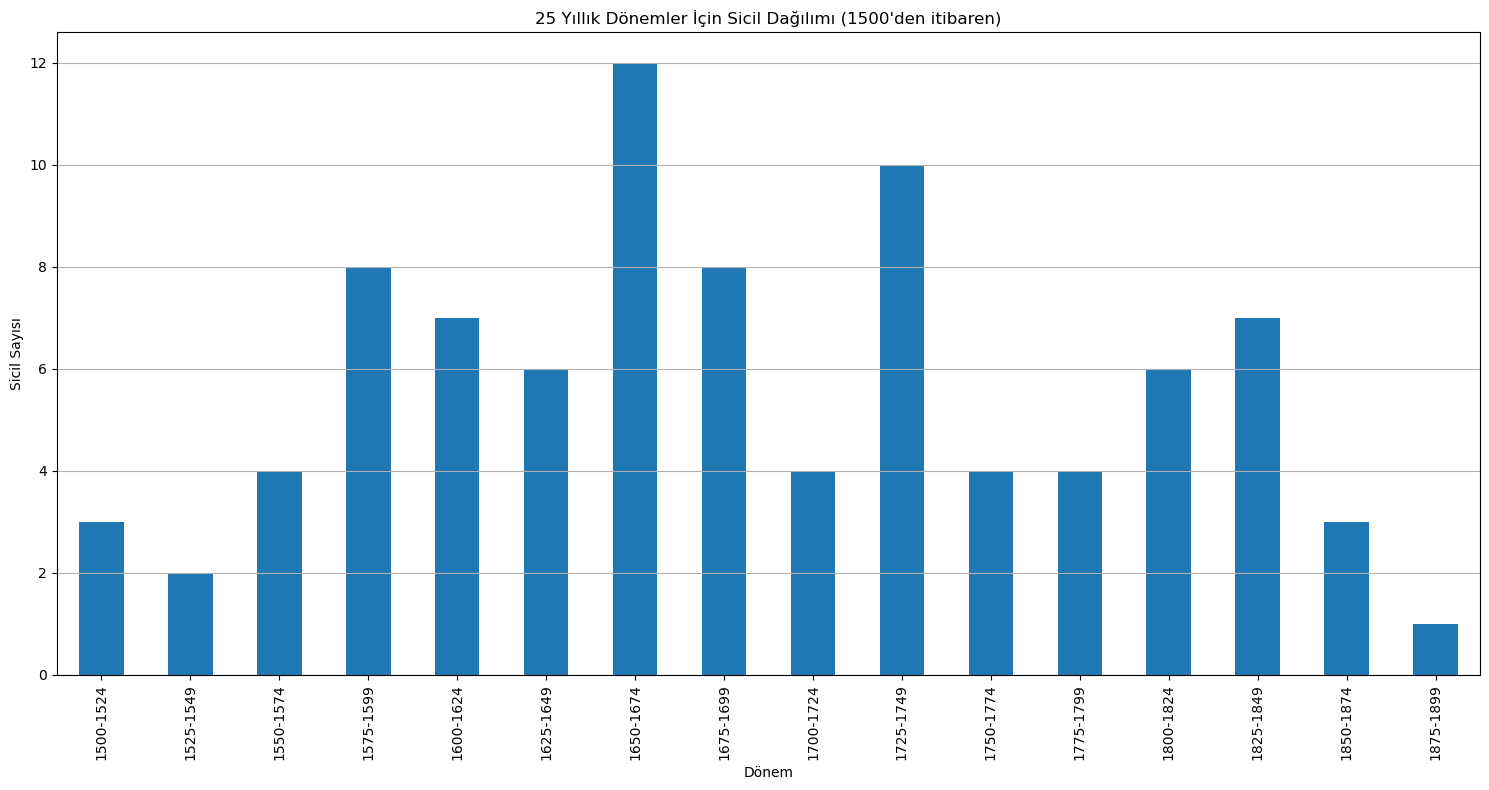

In [27]:
# date_miladi sütununu düzenleyin ve sadece yılı alın
df['year'] = df['date_miladi'].str.extract(r'M\. (\d{4})').astype(float)

# NaN değerlerini kaldırın
df = df.dropna(subset=['year'])

# Yılları 1500'den itibaren 25 yıllık aralıklara ayırın
bins = range(1500, int(df['year'].max()) + 25, 25)
labels = [f"{start}-{start+24}" for start in bins[:-1]]
df['period'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)

# 25 yıllık dönemler için toplam sicil sayısını hesaplayın
periodic_register_counts = df.groupby('period')['sicil_number'].nunique()

# 25 yıllık dönemlerin sicil dağılımını gösteren bir sütun grafiği oluşturun
plt.figure(figsize=(15, 8))
periodic_register_counts.plot(kind='bar')
plt.title('25 Yıllık Dönemler İçin Sicil Dağılımı (1500\'den itibaren)')
plt.xlabel('Dönem')
plt.ylabel('Sicil Sayısı')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

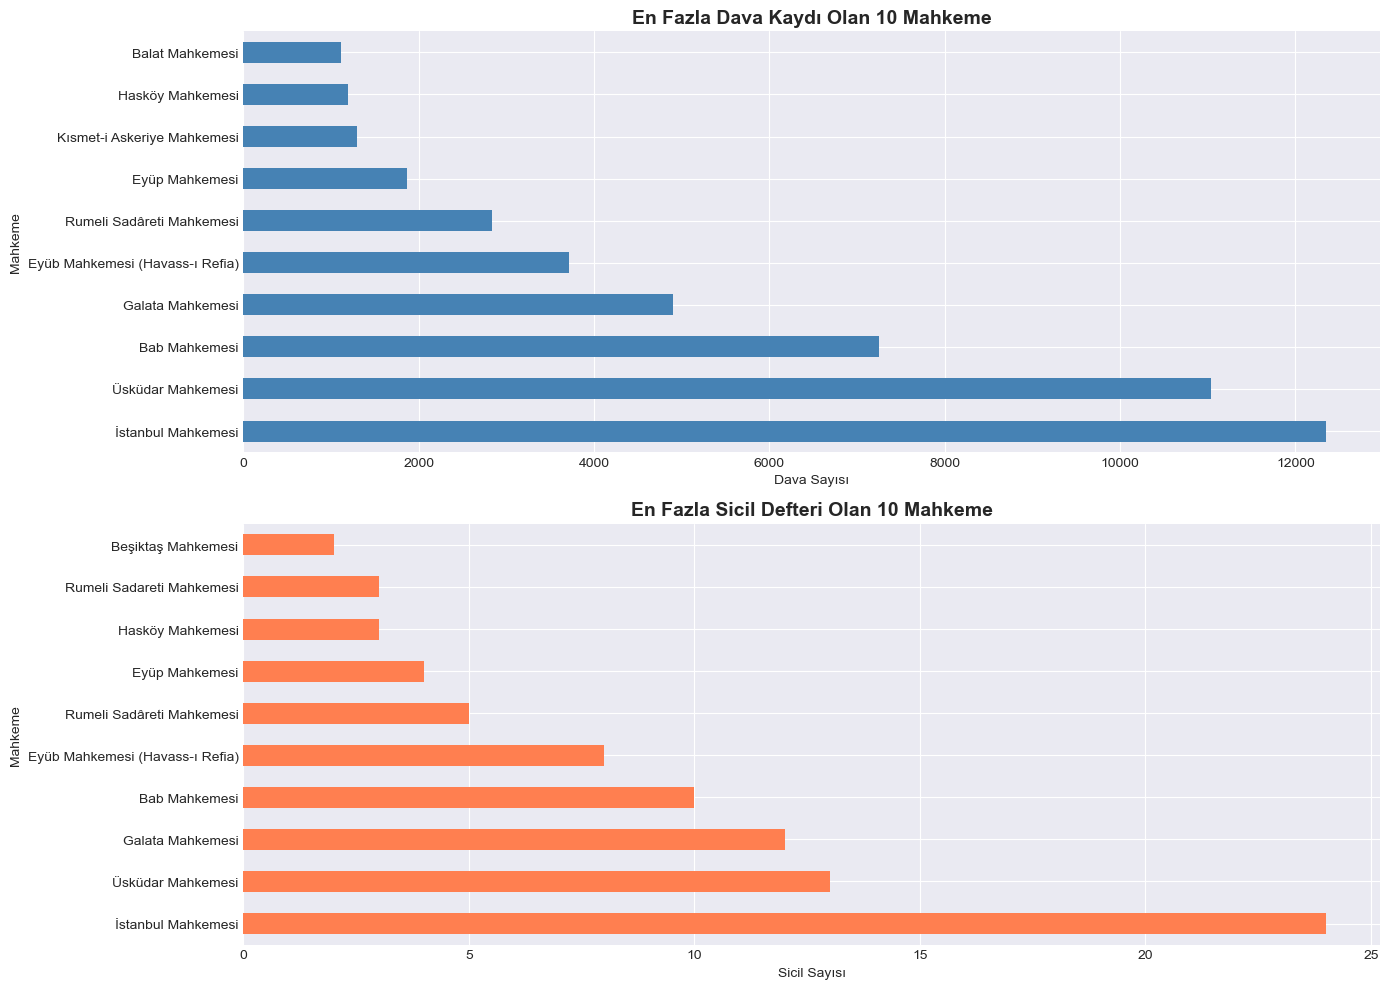

In [30]:
# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Top 10 courts by case count
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Top courts by case count
cases_per_court.head(10).plot(kind='barh', ax=axes[0], color='steelblue')
axes[0].set_title('En Fazla Dava Kaydı Olan 10 Mahkeme', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Dava Sayısı')
axes[0].set_ylabel('Mahkeme')

# Plot 2: Sicil distribution per court
sicil_per_court.head(10).plot(kind='barh', ax=axes[1], color='coral')
axes[1].set_title('En Fazla Sicil Defteri Olan 10 Mahkeme', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Sicil Sayısı')
axes[1].set_ylabel('Mahkeme')

plt.tight_layout()
plt.show()

In [33]:
import os
import glob
import pandas as pd

# Sonuçlar klasörünün yolu
path = os.path.join('..', 'results')  # notebooks klasöründen results klasörüne gider

# Klasördeki tüm CSV dosyalarını al
all_files = glob.glob(os.path.join(path, "*.csv"))

print(f"{len(all_files)} CSV dosyası bulundu")
print("=" * 60)

# Tek tek dataframe'leri saklayacak boş liste
dfs = []

# Her CSV dosyasını oku ve listeye ekle
for i, file in enumerate(all_files, 1):
    try:
        df_temp = pd.read_csv(file)
        
        # Verinin hangi dosyadan geldiğini takip etmek için sütun ekle
        df_temp['kaynak_dosya'] = os.path.basename(file)
        
        dfs.append(df_temp)
        print(f"{i}. Yüklendi: {os.path.basename(file)} - Boyut: {df_temp.shape}")
        
    except Exception as e:
        print(f"❌ Hata - {os.path.basename(file)}: {e}")

50 CSV dosyası bulundu
1. Yüklendi: Beşiktaş Mahkemesi_2.csv - Boyut: (7633, 17)
2. Yüklendi: İstanbul Mahkemesi_3.csv - Boyut: (11005, 17)
3. Yüklendi: Eyüb Mahkemesi (Havass-ı Refia)_37.csv - Boyut: (10417, 17)
4. Yüklendi: Balat Mahkemesi_2.csv - Boyut: (7976, 17)
5. Yüklendi: Üsküdar Mahkemesi_51.csv - Boyut: (9111, 17)
6. Yüklendi: ner_results_istanbul18.csv - Boyut: (13752, 17)
7. Yüklendi: Galata Mahkemesi_65.csv - Boyut: (4745, 17)
8. Yüklendi: Balat Mahkemesi_1.csv - Boyut: (6682, 17)
9. Yüklendi: Bab Mahkemesi_11.csv - Boyut: (10232, 17)
10. Yüklendi: Hasköy Mahkemesi_10.csv - Boyut: (3396, 17)
11. Yüklendi: İstanbul Mahkemesi_191.csv - Boyut: (2474, 17)
12. Yüklendi: Eyüb Mahkemesi (Havass-ı Refia)_3.csv - Boyut: (4854, 17)
13. Yüklendi: Eyüb Mahkemesi (Havass-ı Refia)_19.csv - Boyut: (11380, 17)
14. Yüklendi: Üsküdar Mahkemesi_56.csv - Boyut: (4952, 17)
15. Yüklendi: Bab Mahkemesi_46 .csv - Boyut: (12940, 17)
16. Yüklendi: Tophane Mahkemesi_2.csv - Boyut: (6682, 17)
17. Y

In [37]:

# Kişiler - person_id dolu olanlar (her satır bir kişi)
persons_rows = combined_df[
    (combined_df['person_id'].notna()) & 
    (combined_df['person_id'] != 'N/A') &
    (combined_df['name'] != 'N/A')
]
print(f"  Toplam kişi kaydı: {len(persons_rows):,}")
print(f"  Benzersiz kişi: {persons_rows['person_id'].nunique():,}")
print(f"  Benzersiz isim: {persons_rows['name'].nunique():,}")

# Yerler - place_name dolu olanlar
places_rows = combined_df[
    (combined_df['place_name'].notna()) & 
    (combined_df['place_name'] != 'N/A')
]
print(f"\n  Toplam yer kaydı: {len(places_rows):,}")
print(f"  Benzersiz yer: {places_rows['place_name'].nunique():,}")

print(f"\n  Toplam tarih kaydı: {len(dates_rows):,}")
print(f"  Hicri: {(dates_rows['calendar'] == 'Hijri').sum():,}")

  Toplam kişi kaydı: 256,270
  Benzersiz kişi: 249,672
  Benzersiz isim: 80,475

  Toplam yer kaydı: 61,616
  Benzersiz yer: 13,920

  Toplam tarih kaydı: 46,396
  Hicri: 23,803


### Genel Demographik Analiz

In [38]:
# Önce sadece kişi satırlarını filtrele
persons_df = combined_df[
    (combined_df['person_id'].notna()) & 
    (combined_df['person_id'] != 'N/A') &
    (combined_df['name'] != 'N/A')
].copy()

print(f"\nToplam kişi kaydı: {len(persons_df):,}")
print(f"Benzersiz kişi sayısı: {persons_df['person_id'].nunique():,}")
print(f"Benzersiz dava sayısı: {persons_df['case_unique_id'].nunique():,}")


Toplam kişi kaydı: 256,270
Benzersiz kişi sayısı: 249,672
Benzersiz dava sayısı: 25,267



Cinsiyet sayıları ve yüzdeleri:
  Man: 232,512 (90.73%)
  Woman: 22,949 (8.96%)


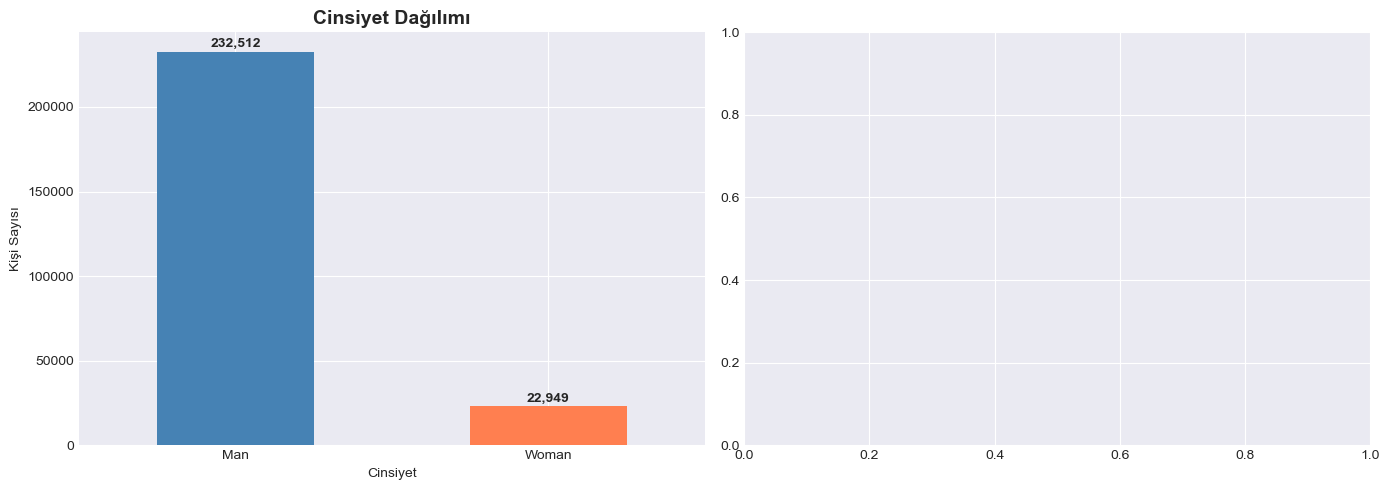

In [42]:
gender_counts = persons_df['gender'].value_counts()
gender_pct = (gender_counts / len(persons_df) * 100).round(2)

print("\nCinsiyet sayıları ve yüzdeleri:")
for gender, count in gender_counts.items():
    pct = gender_pct[gender]
    print(f"  {gender}: {count:,} ({pct}%)")

# Cinsiyet grafiği
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
gender_counts.plot(kind='bar', ax=axes[0], color=['steelblue', 'coral'])
axes[0].set_title('Cinsiyet Dağılımı', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Cinsiyet')
axes[0].set_ylabel('Kişi Sayısı')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)
for i, v in enumerate(gender_counts):
    axes[0].text(i, v + 1000, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Pie chart
# axes[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', 
#             startangle=90, colors=['steelblue', 'coral'])
# axes[1].set_title('Cinsiyet Oranları', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


Din/Etnisite sayıları ve yüzdeleri:
  Muslim: 224,347 (87.54%)
  Greek: 14,078 (5.49%)
  Armenian: 4,594 (1.79%)
  Christian: 2,439 (0.95%)
  Jewish: 2,348 (0.92%)
  Non-Muslim: 1,588 (0.62%)
  Russian: 1,114 (0.43%)
  European: 786 (0.31%)
  Georgian: 159 (0.06%)
  Hungarian: 125 (0.05%)
  Circassian: 108 (0.04%)
  Bosnian: 100 (0.04%)
  Coptic: 77 (0.03%)
  Romani: 54 (0.02%)
  Zimmi: 46 (0.02%)
  Gypsy: 38 (0.01%)
  Nasrâniye: 27 (0.01%)
  Boğdan: 26 (0.01%)
  Zimmî: 26 (0.01%)
  Cypriot: 24 (0.01%)

  ... ve 130 kategori daha


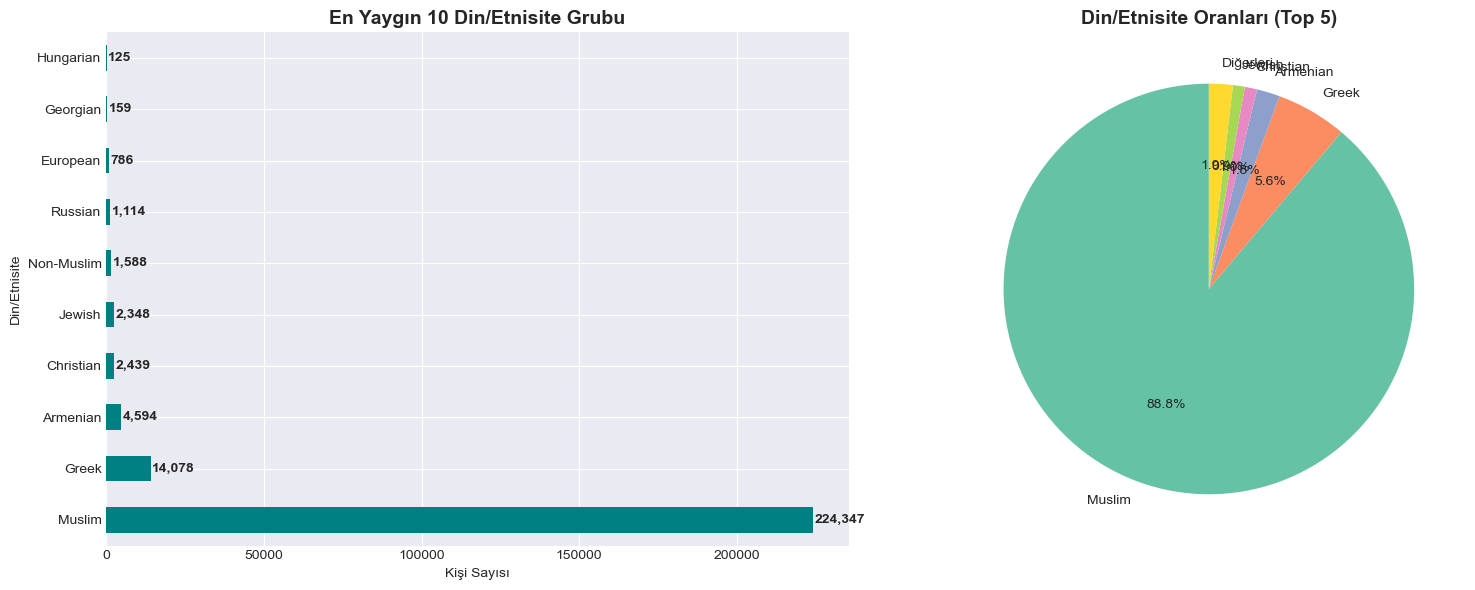

In [43]:
religion_counts = persons_df['religion_ethnicity'].value_counts()
religion_pct = (religion_counts / len(persons_df) * 100).round(2)

print("\nDin/Etnisite sayıları ve yüzdeleri:")
for religion, count in religion_counts.head(20).items():
    pct = religion_pct[religion]
    print(f"  {religion}: {count:,} ({pct}%)")

if len(religion_counts) > 20:
    print(f"\n  ... ve {len(religion_counts) - 20} kategori daha")

# Din/Etnisite grafiği - En yaygın 10
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart - Top 10
top_religions = religion_counts.head(10)
top_religions.plot(kind='barh', ax=axes[0], color='teal')
axes[0].set_title('En Yaygın 10 Din/Etnisite Grubu', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Kişi Sayısı')
axes[0].set_ylabel('Din/Etnisite')
for i, v in enumerate(top_religions):
    axes[0].text(v + 500, i, f'{v:,}', va='center', fontweight='bold')

# Pie chart - Genel dağılım (Top 5 + Diğerleri)
top5 = religion_counts.head(5)
others_sum = religion_counts[5:].sum()
pie_data = pd.concat([top5, pd.Series({'Diğerleri': others_sum})])
colors_pie = sns.color_palette("Set2", len(pie_data))
axes[1].pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', 
            startangle=90, colors=colors_pie)
axes[1].set_title('Din/Etnisite Oranları (Top 5)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()



En yaygın 15 grup için cinsiyet dağılımı:
gender               Man  Woman   All
religion_ethnicity                   
Abaza                 10     14    24
Abazaviyyetü’l-asl     0      1     1
Abaziyyetü’l-asl       0      2     2
Abkhazian              5      2     7
Abyssinian            12      0    12
Acem                   2      0     2
African                3      2     5
Albanian              14      2    16
Arab                  24      0    24
Armenian            4187    398  4585
Arnavud                4      0     4
Arnavut                5      1     6
Austrian               1      0     1
Black                  2      0     2
Bogdanian              0      3     3


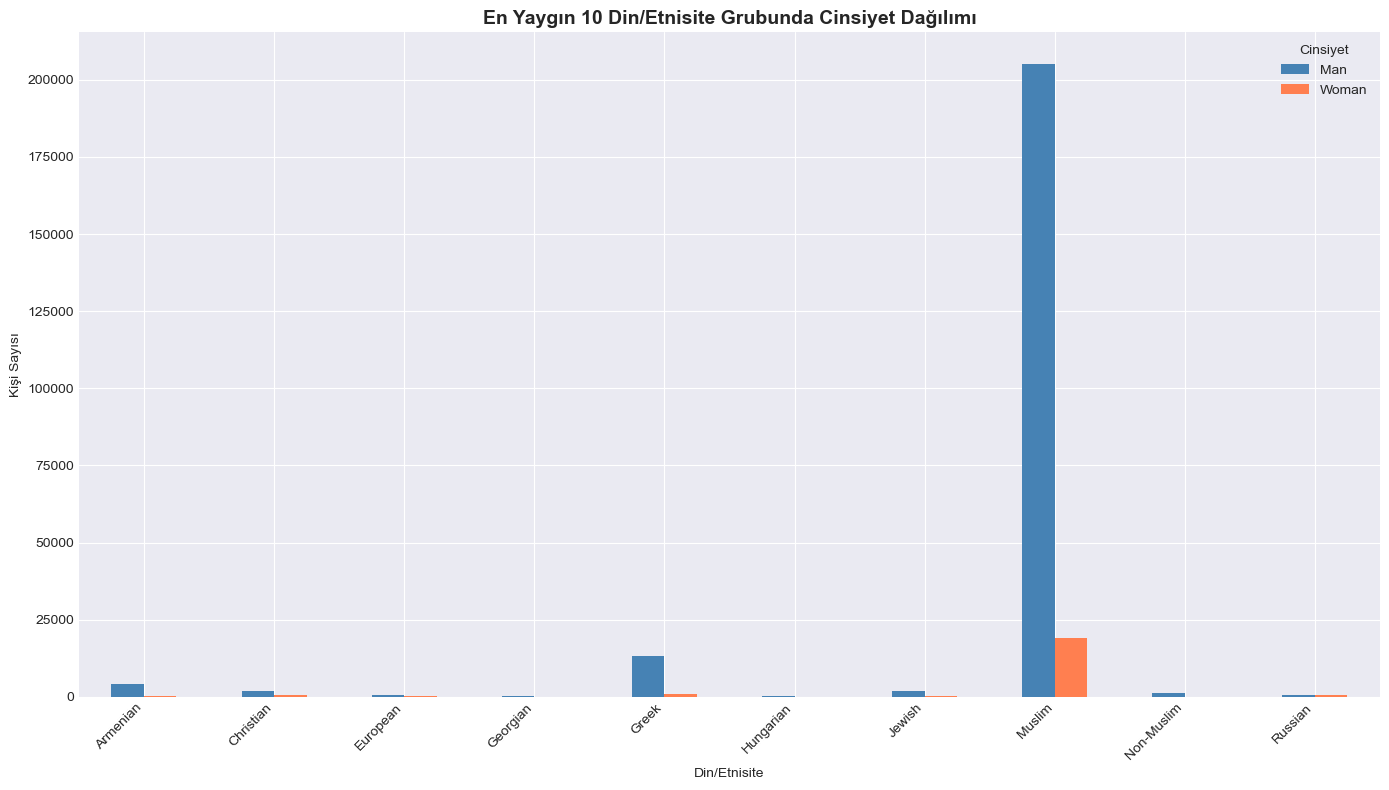

In [44]:
crosstab = pd.crosstab(persons_df['religion_ethnicity'], 
                        persons_df['gender'], 
                        margins=True)

print("\nEn yaygın 15 grup için cinsiyet dağılımı:")
print(crosstab.head(15))

# Görselleştirme - Top 10 din/etnisite için cinsiyet dağılımı
top_10_religions = religion_counts.head(10).index
filtered_df = persons_df[persons_df['religion_ethnicity'].isin(top_10_religions)]

gender_religion = filtered_df.groupby(['religion_ethnicity', 'gender']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(14, 8))
gender_religion.plot(kind='bar', stacked=False, ax=ax, color=['steelblue', 'coral'])
ax.set_title('En Yaygın 10 Din/Etnisite Grubunda Cinsiyet Dağılımı', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Din/Etnisite')
ax.set_ylabel('Kişi Sayısı')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(title='Cinsiyet')
plt.tight_layout()
plt.show()


Sosyal statüsü belirli kişi sayısı: 42,232
Farklı statü/meslek kategorisi: 1077

En yaygın 20 sosyal statü/meslek:
  Bureaucrat: 9,970 (23.607690850539875%)
  Scholar/Ulama: 6,023 (14.261697291153627%)
  Artisan/Craftsperson: 4,577 (10.837753362379239%)
  Trader/Merchant: 3,593 (8.507766622466375%)
  Slave/Enslaved Person: 3,196 (7.567721159310476%)
  Müezzin: 2,409 (5.704205341920819%)
  Janissary: 1,906 (4.513165372229589%)
  Imam: 1,903 (4.506061754120099%)
  Sufi: 1,399 (3.3126539117257057%)
  Sipahi: 521 (1.233661678348172%)
  Judge: 341 (0.8074445917787461%)
  Scribe: 302 (0.7150975563553703%)
  Reis: 237 (0.5611858306497443%)
  Architect: 215 (0.5090926311801478%)
  Witness: 207 (0.4901496495548399%)
  Physician/Healer: 190 (0.4498958136010608%)
  Reisü’l-muhzırîn: 168 (0.39780261413146434%)
  Pilgrim: 157 (0.371756014396666%)
  Religious Leader: 140 (0.33150217844288693%)
  Farmer/Agriculturist: 138 (0.32676643303655994%)


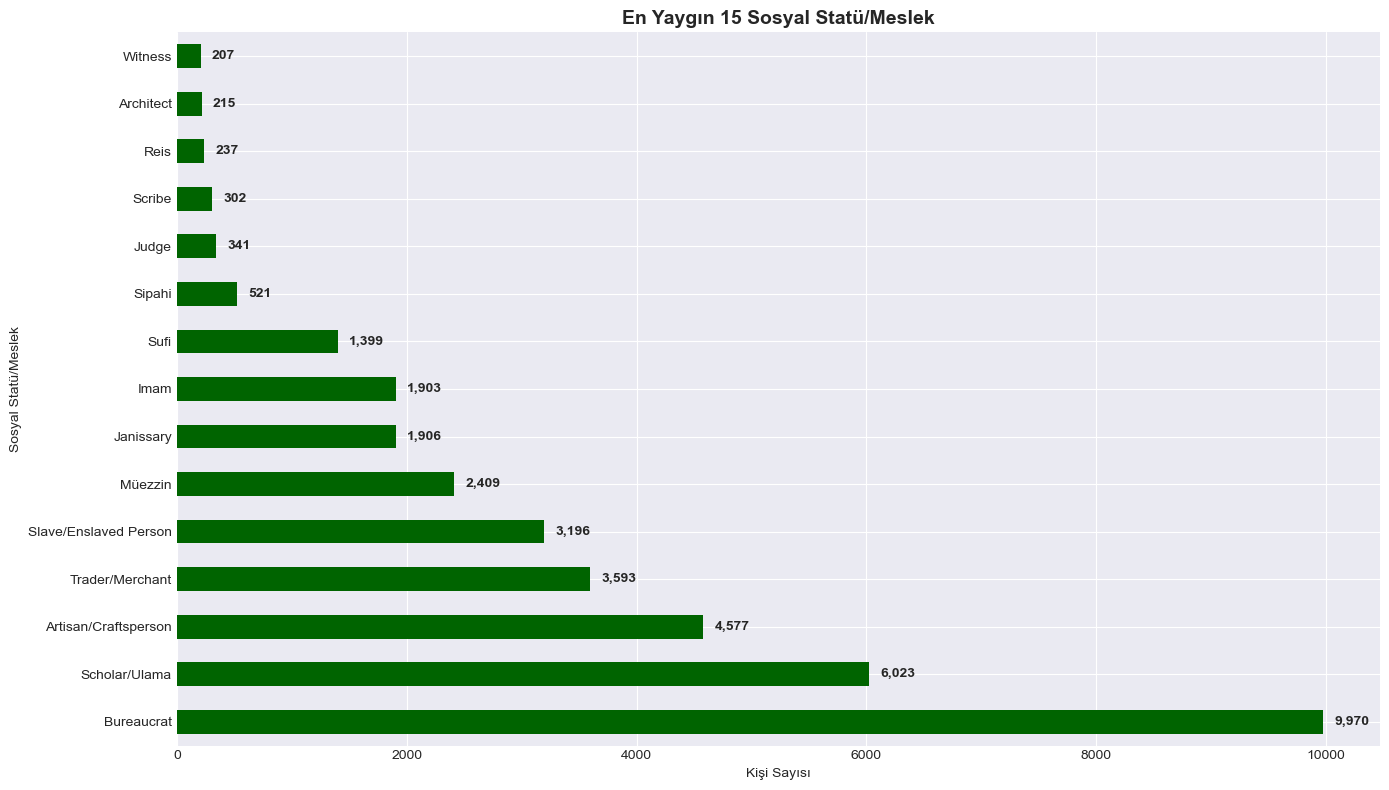

In [47]:
status_df = persons_df[
    (persons_df['social_status_job'].notna()) & 
    (persons_df['social_status_job'] != 'N/A')
]

status_counts = status_df['social_status_job'].value_counts()
print(f"\nSosyal statüsü belirli kişi sayısı: {len(status_df):,}")
print(f"Farklı statü/meslek kategorisi: {len(status_counts)}")
print(f"\nEn yaygın 20 sosyal statü/meslek:")

for status, count in status_counts.head(20).items():
    pct = (count / len(status_df) * 100)
    print(f"  {status}: {count:,} ({pct}%)")

# Sosyal statü grafiği
fig, ax = plt.subplots(figsize=(14, 8))
status_counts.head(15).plot(kind='barh', ax=ax, color='darkgreen')
ax.set_title('En Yaygın 15 Sosyal Statü/Meslek', fontsize=14, fontweight='bold')
ax.set_xlabel('Kişi Sayısı')
ax.set_ylabel('Sosyal Statü/Meslek')
for i, v in enumerate(status_counts.head(15)):
    ax.text(v + 100, i, f'{v:,}', va='center', fontweight='bold')
plt.tight_layout()
plt.show()

In [49]:
print(f"Number of unique social status values: {len(combined_df['social_status_job'].unique())}")

Number of unique social status values: 1078


In [49]:
print(f"Number of unique social status values: {len(combined_df['social_status_job'].unique())}")

Number of unique social status values: 1078


In [51]:
pd.set_option('display.max_rows', None)

In [52]:
print(combined_df['social_status_job'].value_counts(dropna=True).sort_index())

social_status_job
40th Yaya Bölüğü Yaya                              1
Abacı                                              1
Accountant                                        10
Accountant of Waqfs                                1
Acemi Oğlan                                        1
Acemi Oğlanı                                       4
Acemi oğlanı                                       3
Acemioğlan                                         2
Acemioğlanı                                        5
Agent                                              2
Akideci (Trader/Merchant)                          1
Ambassador                                         2
Amil                                               1
Anadolu Ağası                                      1
Apprentice                                         4
Arab Ağa                                           1
Arabacı                                            1
Architect                                        215
Armaşi                      

In [134]:
standardization_map = {
        'Acemi oğlan': 'military',
        'Acemi oğlanı': 'military',
        'Acemioğlan': 'military',
        'Acemioğlanı': 'military',
        '40th yaya bölüğü yaya': 'military',
        'Abacı': 'artisanal',
        'Accountant': 'administrative',
        'Accountant of waqfs' : 'administrative',
        'Agent' : 'administrative',
        'Akideci (trader/merchant)' : 'artisanal',
        'Ambassador' : 'administrative',
        'Amil' : 'religious',
        'Anadolu ağası' : 'military',
        'Apprentice' : 'artisanal',
        'Arab ağa' : 'military',
        'Arabacı' : 'artisanal',
        'Architect' : 'professional',
        'Armaşi' : 'administrative',
        'Arpa emîni' : 'administrative',
        'Arpacı' : 'artisanal',
        'Artisan/craftsperson' : 'artisanal',
        'Artisan/craftsperson (grocer)' : 'artisanal',
        'Artisan/craftsperson (perfumer)' : 'artisanal',
        'Ases': 'military',
        'Asesbaşı' : 'military',
        'Asesbaşı (chief of night watchmen)': 'military',
        'Asesler kethüdâsı' : 'military',
        'Askerî kassâm' : 'military',
        'Assistant' : 'administrative',
        'Attar' : 'artisanal',
        'Attâr' : 'artisanal',
        'Auctioneer' : 'artisanal',
        'Azeb' : 'military',
        'Ağa' : 'military',
        'Ağa of the saadetlu kaymakam pasha' : 'administrative',
        'Aşçı' : 'artisanal',
        'Aşçı-i sultânî' : 'artisanal',
        'Aşçıbaşı' : 'artisanal',
        'bahriye kâtibi' : 'administrative',
        'bahçevân' : 'artisanal',
        'bakara-hân' : 'religious',
        'baker' : 'artisanal',
        'bakkal' : 'artisanal',
        'bakkal (grocer)' : 'artisanal',
        'bakkalân pazarbaşı' : 'artisanal',
        'baltacı' : 'artisanal',
        'baltacılar kethudası' : 'artisanal',
        'ban' : 'artisanal',
        'barber' : 'artisanal',
        'barber and grocer' : 'artisanal',
        'bathhouse attendant' : 'artisanal',
        'bathhouse keeper' : 'artisanal',
        'bayrakdâr' : 'military',
        'bayraktar' : 'military',
        'baytar' : 'service',
        'baş defterdâr' : 'administrative',
        'başbâkīkulu' : 'administrative',
        'başkorucu' : 'military',
        'baştezkireci' : 'military',
        'başyedekçi' : 'military',
        'bekçi' : 'military',
        'bevvâb' : 'military',
        'bevvâb (doorkeeper)' : 'military',
        'bevvâb (gatekeeper)' : 'military',
        'bevvâb-ı sultanî' : 'military',
        'bevvâb-ı sultanî (gatekeeper)' : 'military',
        'bevvâb-ı sultânî' : 'military',
        'bevvâbü dârü’s-saâde' : 'military',
        'bevvâbü’s-sultânî' : 'military',
        'bey' : 'administrative',
        'bey of antakya' : 'administrative',
        'beylerbeyi' : 'administrative',
        'beytülmal emîni' : 'administrative',
        'beytülmal officer' : 'administrative',
        'beytülmal-i hassa emîni' : 'administrative',
        'beytülmâl' : 'administrative',
        'beytülmâl emin' : 'administrative',
        'beytülmâl emîni' : 'administrative',
        'beytülmâl emîni (treasurer)' : 'administrative',
        'beytülmâl emîni (treasury official)' : 'administrative',
        'beytülmâl emîni (treasury trustee)' : 'administrative',
        'beytülmâl mültezimi' : 'administrative',
        'beytülmâl-i hâs emîni' : 'administrative',
        'beytülmâl-i hâssı emîni' : 'administrative',
        'beytülmâl-i mezbûrun nâzırı' : 'administrative',
        'beytülmâl-i âmme emîni' : 'administrative',
        'beytülmâl-i âmmın emîni' : 'administrative',
        'beytü’l-mâl emîni' : 'administrative',
        'beytü’l-mâl officer' : 'administrative',
        'bezci' : 'artisanal',
        'bezzâzistân kethüdâsı' : 'artisanal',
        'bishop' : 'religious',
        'blacksmith' : 'artisanal',
        'boatman' : 'artisanal',
        'boatmen guild leader' : 'artisanal',
        'bookbinder' : 'artisanal',
        'bostancı' : 'military',
        'bostancı kethüdâsı' : 'military',
        'bostancıbaşı' : 'military',
        'bostancılar kethüdâsı başhasekisi' : 'military',
        'bostancılar odabaşısı' : 'military',
        'bostânî' : 'military',
        'bostânî (gardener)' : 'military',
        'bozacı' : 'artisanal',
        'bureaucrat' : 'administrative',
        'bureaucrat (former judge)' : 'administrative',
        'bursa kadısı' : 'administrative',
        'butcher' : 'artisanal',
        'butcher guild steward' : 'artisanal',
        'button maker' : 'artisanal',
        'buzcu' : 'artisanal',
        'bâb-ı sa‘âdet bevvâb' : 'military',
        'bölükbaşı' : 'military',
        'börekçi' : 'artisanal',
        'cabi' : 'administrative',
        'calligrapher' : 'artisanal',
        'camel driver' : 'artisanal',
        'candle maker guild steward' : 'artisanal',
        'captain' : 'military',
        'caretaker' : 'artisanal',
        'carpenter' : 'artisanal',
        'carriage driver' : 'artisanal',
        'cebeci' : 'military',
        'cebecibaşı' : 'military',
        'celeb tâ’ifesinden' : 'artisanal',
        'cerrâh (surgeon)' : 'artisanal',
        'chef' : 'artisanal',
        'chief butler' : 'artisanal',
        'chief clerk' : 'administrative',
        'chief of bailiffs' : 'administrative',
        'chief usher' : 'administrative',
        'city officer' : 'administrative',
        'cizye officer' : 'administrative',
        'clergy' : 'religious',
        'clergyman' : 'religious',
        'cleric' : 'administrative',
        'clockmaker' : 'artisanal',
        'collector' : 'administrative',
        'commander' : 'military',
        'community leader' : 'administrative',
        'convert' : 'religious',
        'cook' : 'artisanal',
        'cook at the new imperial palace' : 'artisanal',
        'cotton carder' : 'artisanal',
        'court clerk' : 'administrative',
        'court messenger' : 'administrative',
        'court officer' : 'administrative',                                     
        'court official' : 'administrative',                                     
        'court scribe' : 'administrative', 
        'court servant' : 'administrative', 
        'court summoner' : 'administrative',                     
        'court trustee' : 'administrative', 
        'crafts guild member' : 'artisanal',
        'crafts guild member (carpenter)' : 'artisanal',
        'craftsman' : 'artisanal',
        'craftsperson' : 'artisanal', 
        'crier' : 'artisanal',        
        'current sâhib-i ayâr' : 'administrative',
        'customs officer' : 'administrative',
        'customs official' : 'administrative',
        'câbi' : 'administrative',
        'câbi (tax collector)' : 'administrative',
        'câbi and kāimmakām-ı mütevellî' : 'administrative',
        'câbî' : 'administrative',
        'câbî (collector)' : 'administrative',
        'câbî and kāimmakām-ı mütevellî' : 'administrative',
        'câbî-i evkāf' : 'administrative',
        'câbî-i kârbânsaray' : 'administrative',
        'câbî-i vakf' : 'administrative',
        'câbî-i âsiyâb' : 'administrative',
        'cündi' : 'military',                                             
        'cündî' : 'military',                                            
        'cündî (military personnel)' : 'military',                         
        'cündî (soldier)' : 'military',                                  
        'cüzhân' : 'artisanal',                                          
        'danişmend' : 'military',                                         
        'davud paşa mütevellîsi' : 'administrative',                             
        'debbağ' : 'artisanal',                                             
        'debbağ (tanner)' : 'artisanal',                                   
        'defterdar' : 'administrative',                                          
        'defterdâr' : 'administrative',                                          
        'dellâl' : 'administrative',                                             
        'dellâl (auctioneer)' : 'administrative',                                
        'demircibaşı' : 'artisanal',                                        
        'deputy' : 'religious',                                             
        'deputy imam' : 'religious',                                        
        'deputy imam and teacher' : 'religious',                           
        'deputy judge' : 'administrative',                                       
        'deputy trustee' : 'administrative',                                     
        'dergâh-ı âlî solak': 'sufi',                                 
        'dergâh-ı âlî çorbacı' : 'artisanal',                               
        'derviş' : 'sufi',                                             
        'devir-hân' : 'sufi',                                          
        'diplomat/envoy' : 'administrative',                                    
        'divan kâtibi' : 'administrative',                                       
        'doorkeeper' : 'artisanal',                                         
        'doorman' : 'artisanal',                                           
        'driver' : 'artisanal',                                             
        'dârü’s-sa‘âde ağa' : 'administrative',                                  
        'dârü’ş-şifâ ağa' : 'administrative',                                    
        'dîvân efendisi' : 'administrative',                                     
        'dîvân-ı âlî kâtibi' : 'administrative',                                 
        'düğmeci' : 'artisanal',                                            
        'eczâ-hân' : 'artisanal',                                           
        'eczâ-hân (pharmacist)' : 'artisanal',                             
        'eflak voyvoda' : 'administrative',                                      
        'ehl-i hibre' : 'artisanal',                                        
        'ekmekci' : 'artisanal',                                            
        'ekmekçiler kethüdâsı' : 'artisanal',                               
        'el-bevvâb' : 'artisanal',                                          
        'el-câbî' : 'artisanal',                                            
        'el-cündî' : 'artisanal',                                           
        'el-kâtib' : 'administrative',                                           
        'el-muhzır' : 'administrative',                                         
        'el-mübâşir' : 'administrative',                                         
        'el-mülâzım' : 'administrative',                                         
        'el-münâdî' : 'administrative',                                          
        'elder' : 'administrative',                                              
        'emekdar' : 'artisanal',                                           
        'emin' : 'administrative',                                               
        'emin-i beytü’l-mâl' : 'administrative',                                 
        'emir-i ahur' : 'military',                                        
        'emir-i alay' : 'military',                                        
        'emânet-i beytü’l-mâl zâbiti' : 'administrative',                        
        'emîn' : 'administrative',                                               
        'emîn-i beytülmâl' : 'administrative',                                   
        'emîn-i beytülmâl-i hâs' : 'administrative',                             
        'emîn-i darbhâne' : 'administrative',                                    
        'emîn-i defterî' : 'administrative',                                     
        'emîn-i matbah-ı mahmud paşa' : 'administrative',                        
        'emîni and mültezimi' : 'administrative',                                
        'engineer' : 'artisanal',                                           
        'enslaved person' : 'slavery',                                   
        'enslaved person (formerly)' : 'slavery',                         
        'erbâb-ı timar' : 'administrative',                                      
        'erbâb-ı tımar' : 'administrative',                                      
        'es-silâhî' : 'military',                                          
        'esirci (slave trader)' : 'slavery',                              
        'esîrci' : 'slavery',                                             
        'executor' : 'administrative',                                           
        'executor of will' : 'administrative',                                   
        'expert witness' : 'administrative',                                     
        'ez-zevvâk' : 'artisanal',   
        'fahrü’l-a‘yân' : 'administrative',                                      
        'fahrü’l-cuyûş' : 'military',                                      
        'fahrü’l-cüyûş' : 'military',                                      
        'fahrü’l-eimme' : 'administrative',                                      
        'fahrü’l-kuzât' : 'administrative',                                      
        'fahrü’l-küttâb' : 'administrative',                                     
        'fahrü’l-muhadderât' : 'administrative',                                 
        'fahrü’l-müderrisîn' : 'religious',                                 
        'fahrü’l-ümenâ' : 'administrative',                                      
        'fahrü’l-ümerâ' : 'administrative',                                      
        'fahrü’ş-şüyûh' : 'religious',                                      
        'farm manager' : 'farming',                                       
        'farmer' : 'farming',                                              
        'farmer/agriculturist' : 'farming',                             
        'ferrâş' : 'artisanal',                                             
        'ferrâş (caretaker)' : 'artisanal',                                 
        'ferrâş (caretaker/sweeper)' : 'artisanal',                         
        'fethiye i̇mamı' : 'religious',                                     
        'fisherman' : 'artisanal',                                          
        'flower seller' : 'artisanal',                                      
        'foot soldier' : 'military',                                       
        'former anatolian kadıaskeri' : 'administrative',                        
        'former bey of peçuy' : 'administrative',                                
        'former beytü’l-mâl emîni' : 'administrative',                          
        'former bosnian judge' : 'administrative',                               
        'former bostancıbaşı' : 'military',                                
        'former collector' : 'administrative',                                   
        'former customs officer' : 'administrative',                             
        'former fish commissioner' : 'administrative',                           
        'former grocer' : 'artisanal',                                      
        'former imam' : 'religious',                                        
        'former inspector' : 'administrative',                                   
        'former janissary' : 'military',                                   
        'former janissary kethüda' : 'military',                           
        'former judge' : 'administrative',                                       
        'former judge of aleppo' : 'administrative',                             
        'former judge of baghdad' : 'administrative',                            
        'former judge of damascus' : 'administrative',                           
        'former judge of ebâ eyyûb-i ensârî' : 'administrative',                 
        'former judge of erzurum' : 'administrative',                            
        'former judge of kuds-i şerîf' : 'administrative',                       
        'former judge of mahmiye-i galata' : 'administrative',                   
        'former judge of manisa' : 'administrative',                             
        'former judge of medina' : 'administrative',                             
        'former judge of mekke-i mükerreme' : 'administrative',                  
        'former judge of tavas' : 'administrative',                              
        'former kadı' : 'administrative',                                        
        'former kadı of yenişehir' : 'administrative',                           
        'former maraş kadı' : 'administrative',                                  
        'former military judge' : 'administrative',                              
        'former mütesellim' : 'administrative',                                  
        'former qadi of jerusalem' : 'administrative',                          
        'former rumeli kazasker' : 'administrative',                             
        'former ship captain' : 'military',                                
        'former slave' : 'slavery',                                      
        'former sofya mütesellim' : 'administrative',                            
        'former sürekçi, current meyhâneci' : 'artisanal',                  
        'former tokat judge' : 'administrative',                                 
        'former trustee' : 'administrative',                                    
        'former turnacıbaşı' : 'artisanal',                                 
        'former voivode of boğdan' : 'administrative',                           
        'former voivode of moldavia' : 'administrative',                         
        'former waqf trustee' : 'administrative',                                
        'formerly enslaved person' : 'slavery',                           
        'freed person' : 'slavery',                                       
        'freed slave' : 'slavery',                                       
        'freedman' : 'slavery',                                           
        'freedwoman' : 'slavery',                                         
        'furrier' : 'artisanal',
        'Galata Crier' : 'artisanal',
        'Galata voyvodası' : 'artisanal',                             
        'Gardener' : 'artisanal',                                    
        'Gatekeeper' : 'artisanal',                               
        'Gemi Reisi' : 'artisanal',                                 
        'Governor' : 'administrative',                              
        'Grocer' : 'artisanal',                           
        'Guard' : 'military',                                              
        'Guardian' : 'military',                                           
        'Guardian of Orphans' : 'military',                                
        'Gümrük Emîni' : 'artisanal',                         
        'Gümrük Hamalı' : 'artisanal',                        
        'Gılmân-ı Acemiyân' : 'slavery',                        
        'Haffâf' : 'artisanal',                     
        'Hafizu’l-kitâb' : 'religious',                       
        'Hafız' : 'religious',                   
        'Hafız (Guardian of the Book)' : 'administrative',                  
        'Hafız-ı Kitâb Yaya' : 'administrative',                 
        'Hafızu’l-kitâb' : 'administrative',                  
        'Hafızü’l-kitâb' : 'administrative',                
        'Halife' : 'religious',                  
        'Halife-i Mekteb' : 'religious',                 
        'Halîfe-i Mekteb' : 'religious',                
        'Halîfe-i mekteb' : 'religious',               
        'Halîfe-i rûznâmçe-i küçük' : 'administrative',             
        'Hamal' : 'artisanal',            
        'Hamal (Porter)' : 'artisanal',             
        'Hamal Kethüdâsı' : 'artisanal',             
        'Hamallar' : 'artisanal',            
        'Hamam Keeper' : 'artisanal',             
        'Hamam Operator' : 'artisanal',             
        'Hamamcı' : 'artisanal',
        'Hamamcı-i Ayasofya' : 'artisanal',                                 
        'Hamamcı-i Mehmed Paşa der-Galata' : 'artisanal',                   
        'Hamamcı-i Çinili' : 'artisanal',                                   
        'Hamamcılar Kethüdâsı' : 'artisanal',                               
        'Hamlacı' : 'artisanal',                                            
        'Hammal' : 'artisanal',                                             
        'Hammam Keeper' : 'artisanal',                                      
        'Hammam operator' : 'artisanal',                                    
        'Hammâmî' : 'artisanal',                                           
        'Hammâmî-i Aksaray' : 'artisanal',                                  
        'Hammâmî-i Piyale Paşa' : 'artisanal',                              
        'Hammâr (Wine Seller)' : 'artisanal',                               
        'Harbendebaşı' : 'artisanal',                                       
        'Haremeyn Mütevellîsi' : 'administrative',                               
        'Haremeyn mütevellîsi' : 'administrative',                               
        'Hasbî mütevellî' : 'administrative',                                    
        'Haseki Ağa' : 'administrative',                                         
        'Hasköy Subaşı' : 'military',                                      
        'Hassa Bostancı' : 'military',                                     
        'Hassa Cook' : 'artisanal',                                         
        'Hassa Mehter' : 'military',                                       
        'Hassa Tabbah' : 'artisanal',                                       
        'Hasırcı' : 'artisanal',                                            
        'Hatib' : 'religious',                                             
        'Hatip' : 'religious',                                              
        'Hatîb' : 'religious',                                             
        'Hatîb (Preacher)' : 'religious',                                   
        'Hatîb (preacher)' : 'religious',                                   
        'Hatîb-i Câmi‘-i Mehmed' : 'religious',                             
        'Hayyât-ı emîrî' : 'administrative',                                     
        'Hazinedâr Başı' : 'administrative',                                     
        'Hazînedar' : 'administrative',                                          
        'Hazînedâr' : 'administrative',                                          
        'Head Muezzin' : 'religious',                                       
        'Head of special division' : 'administrative',                           
        'Head tailor' : 'artisanal',                                        
        'Helvacı' : 'artisanal',                                            
        'Hoca-i mekteb' : 'religious',                                      
        'Hâfız' : 'religious',                                              
        'Hâfızu’l-kitâb' : 'administrative',                                     
        'Hâfızü’l-kitâb' : 'administrative',                                     
        'Hâmil-i hâze’l-kitâb' : 'administrative',                               
        'Hâssa Architect' : 'artisanal',                                    
        'Hâssa Bostancı' : 'military',                                     
        'Hâssa Koyun Sürücüsü' : 'artisanal',                               
        'Hâssa Sürücü' : 'artisanal',                                       
        'Hâssa architect' : 'artisanal',                                    
        'Hâssa bostancı' : 'military',                                     
        'Hâssa helvacı' : 'artisanal',                                      
        'Hâssa sarrâc' : 'artisanal',                                       
        'Hâssa su nâzırı' : 'artisanal',                                    
        'Hâssa tavukçularından' : 'artisanal',                              
        'Hâssa topçular zümresinden' : 'artisanal',                         
        'Hâssa çakırcısı' : 'artisanal',                                    
        'Hâzin-i Sultânî' : 'administrative',                                    
        'Imam' : 'religious',                                            
        'Imam and Hatib' : 'religious',                                     
        'Imam and Teacher' : 'religious',                                   
        'Imam and preacher' : 'religious',                                  
        'Imam of Istabl-ı âmire' : 'religious',                             
        'Imam, Scholar/Ulama' : 'religious',                                
        'Imâm' : 'religious',
        'Innkeeper' : 'artisanal',                                          
        'Inspector of Waqfs' : 'administrative',                                 
        'Interpreter' : 'administrative',                                        
        'Irgad' : 'artisanal',                                              
        'Irgat' : 'artisanal',                                              
        'Istari' : 'artisanal',                                             
        'Janissary' : 'military',                                       
        'Janissary Ağa' : 'military',                                      
        'Janissary Beytülmâl Emin' : 'military',                           
        'Janissary Beytülmâl Emîni' : 'military',                          
        'Janissary Commander' : 'military',                                
        'Janissary Scribe' : 'military',                                   
        'Janissary, Piyade Bey' : 'military',                              
        'Jeweler' : 'artisanal',                                            
        'Judge' : 'administrative',                                            
        'Judge (Kadı)' : 'administrative',                                       
        'Kadi' : 'administrative',                                               
        'Kadi (Judge)' : 'administrative',                                       
        'Kadı' : 'administrative',                                              
        'Kadı (Judge)' : 'administrative',                                       
        'Kadıasker-i Muhzır' : 'administrative',                                 
        'Kadırga Reisi (Galley Captain)' : 'military',                     
        'Kahveci' : 'artisanal',                                            
        'Kaimmakam' : 'administrative',                                          
        'Kalafatçı (Shipbuilder)' : 'artisanal',                            
        'Kalaycı' : 'artisanal',                                            
        'Kalyon Reis' : 'military',                                        
        'Kapudan' : 'military',                                            
        'Kapudân' : 'military',                                            
        'Kapıcı' : 'military',                                             
        'Kapıcıbaşı' : 'military',                                         
        'Kapıcılar Bölükbaşı' : 'military',                                
        'Kapıcılar Bölükbaşısı' : 'military',                              
        'Kapıcılar Kethudası' : 'military',                                
        'Kapıcılar Kethüdâsı' : 'military',                                
        'Karaman beylerbeyi' : 'administrative',                                 
        'Karcıbaşı' : 'artisanal',                                          
        'Kasapbaşı' : 'artisanal',                                          
        'Kassab' : 'artisanal',                                             
        'Kassam' : 'military',                                             
        'Kassâb' : 'artisanal',                                             
        'Kassâm' : 'military',                                             
        'Kassâm Kâtibi' : 'military',                                      
        'Kassâm-ı Askerî' : 'military',                                    
        'Kassâm-ı askerî' : 'military',                                    
        'Kassâm-ı askerî muhzırı' : 'military',                            
        'Kassâmü’l-askerî' : 'military',                                   
        'Katib' : 'administrative',                                              
        'Katib (Scribe)' : 'administrative',                                     
        'Kavukçular Kethüdâsı' : 'artisanal',                               
        'Kayyim' : 'administrative',                                             
        'Kayyum' : 'administrative',                                            
        'Kayyûm' : 'administrative',                                            
        'Kayyım' : 'administrative',                                            
        'Kayyım (Custodian)' : 'administrative',                                 
        'Kayyım-i câmi‘-i şerîf' : 'administrative',                             
        'Kayık Kapıcısı' : 'artisanal',                                     
        'Kayıkçı' : 'artisanal',                                            
        'Kayıkçılar Kethüdâsı' : 'artisanal',                               
        'Kazasker' : 'administrative',                                           
        'Kazganî' : 'artisanal',                                            
        'Kazzâz (Silk Weaver)' : 'artisanal',                               
        'Kehhâl (Oculist)' : 'artisanal',                                   
        'Kerasteci' : 'artisanal',                                          
        'Keresteci' : 'artisanal', 
        'Kethudâ' : 'artisanal',                                            
        'Kethudâ-yı Hazret-i Efendi' : 'artisanal',                         
        'Kethudâ-yı Silâhdârân' : 'artisanal',                              
        'Kethudâ-yı keresteciyân' : 'artisanal',                            
        'Kethudâ-yı muhzırân' : 'artisanal',                                
        'Kethudâyeri Kâtibi' : 'artisanal',                                 
        'Kethüda' : 'artisanal',                                           
        'Kethüda (Steward)' : 'artisanal',                                  
        'Kethüda of Bezzâzistân' : 'artisanal',                             
        'Kethüda-i Sipahiyan' : 'artisanal',                                
        'Kethüda-yı Kassâbân' : 'artisanal',                                
        'Kethüda-yı bezzâzistân' : 'artisanal',                             
        'Kethüda-yı haffâfân' : 'artisanal',                                
        'Kethüda-yı muhzırân' : 'artisanal',                                
        'Kethüda-yı muhzırîn' : 'artisanal',                                
        'Kethüda-yı pereme' : 'artisanal',                                  
        'Kethüdayeri' : 'artisanal',                                        
        'Kethüdâ' : 'artisanal',                                           
        'Kethüdâ-i Hammâmcıyân' : 'artisanal',                              
        'Kethüdâ-i Mimar' : 'artisanal',                                    
        'Kethüdâ-i teberdârân' : 'artisanal',                               
        'Kethüdâ-yı Azeb' : 'artisanal',                                    
        'Kethüdâ-yı Kürkçüyân' : 'artisanal',                               
        'Kethüdâ-yı Muhzırân' : 'artisanal',                                
        'Kethüdâ-yı Topçuyân' : 'artisanal',                                
        'Kethüdâ-yı bezzâzistan-ı Galata' : 'artisanal',                    
        'Kethüdâ-yı bostancıyân' : 'artisanal',                             
        'Kethüdâ-yı bostâniyân' : 'artisanal',                              
        'Kethüdâ-yı ekmekçiyân' : 'artisanal',                              
        'Kethüdâ-yı habbâzan' : 'artisanal',                               
        'Kethüdâ-yı haffâfân' : 'artisanal',                                
        'Kethüdâ-yı hamamciyân' : 'artisanal',                              
        'Kethüdâ-yı kasabân' : 'artisanal',                                 
        'Kethüdâ-yı kassâbân' : 'artisanal',                                
        'Kethüdâ-yı muhzırân' : 'artisanal',                               
        'Kethüdâ-yı muhzırîn' : 'artisanal',                                
        'Kethüdâ-yı mumcuyân' : 'artisanal',                                
        'Kethüdâ-yı çiftlik' : 'artisanal',                                 
        'Kethüdâyeri' : 'artisanal',                                        
        'Kethüdâyeri Çukadârı' : 'artisanal',                               
        'Kethüdâ’ü’l-muhzırîn' : 'artisanal',                               
        'Keyyâl-i Kapan' : 'artisanal',                                     
        'Khatib' : 'administrative',                                             
        'Kilarî' : 'artisanal',                                             
        'Kiler-i hâssa kethüdâsı' : 'artisanal',                            
        'Kilerci' : 'artisanal',                                            
        'Kilârî' : 'artisanal',                                             
        'Kolicari' : 'artisanal',                                           
        'Kolisi' : 'artisanal',                                             
        'Korucu' : 'military',                                             
        'Kutucu (Box Maker)' : 'artisanal',                                
        'Kuşçu' : 'artisanal',                                              
        'Kâid-i sultânî' : 'administrative',                                     
        'Kâimmakâm-ı Mütevellî' : 'administrative',                              
        'Kâtib' : 'administrative',                                             
        'Kâtib (Scribe)' : 'administrative',                                     
        'Kâtib (scribe)' : 'administrative',                                     
        'Kâtib-i Gümrük' : 'administrative',                                     
        'Kâtib-i Muhâsebe' : 'administrative',                                   
        'Kâtib-i Ruznâmçe (Scribe)' : 'administrative',                          
        'Kâtib-i Vakf-ı Kılıç Ali Paşa' : 'administrative',                      
        'Kâtib-i Vakıf (Scribe of the Waqf)' : 'administrative',                 
        'Kâtib-i evkāf-ı mezbûre' : 'administrative',                            
        'Kâtib-i gümrük' : 'administrative',                                     
        'Kâtib-i mehterân-ı hâssa' : 'administrative',                           
        'Kâtib-i müşâhere' : 'administrative',                                   
        'Kâtib-i vakf' : 'administrative',                                       
        'Kâtib-i vakıf' : 'administrative',                                      
        'Kâtibü’l-hurûf' : 'administrative',                                     
        'Kömürcü' : 'artisanal',                                            
        'Köprücü' : 'artisanal',                                            
        'Köşk bekçisi' : 'military',                                       
        'Kürekçi (Oarsman)' : 'artisanal',                                  
        'Kādî' : 'administrative',                                               
        'Kāid' : 'administrative',                                               
        'Kāim-i makām' : 'administrative',                                       
        'Kāimmakām-ı imâm' : 'administrative',    
        'Laborer' : 'artisanal',                                            
        'Legal Representative' : 'administrative',                               
        'Levend' : 'military',                                             
        'Logofen'  : 'administrative',                                            
        'Market Inspector' : 'administrative',                                   
        'Masraf Kâtibi' : 'administrative',                                      
        'Master Builder' : 'artisanal',                                     
        'Master Craftsman' : 'artisanal',                                   
        'Mefharü’l-vâ‘izîn' : 'administrative',                                  
        'Mehter' : 'military',                                             
        'Mehter (Musician)' : 'military',                                  
        'Mekârî' : 'artisanal',                                             
        'Mellâh' : 'artisanal',                                             
        'Mendilci' : 'artisanal',                                           
        'Menzil Kethudası' : 'artisanal',                                   
        'Meremmâtî' : 'artisanal',                                          
        'Metropolitan' : 'religious',                                      
        'Mevkūfâtî' : 'artisanal',                                          
        'Meyhaneci (Innkeeper)' : 'artisanal',                              
        'Meyhaneci (Tavern Keeper)' : 'artisanal',                          
        'Meyhâneci' : 'artisanal',                                          
        'Meyhâneci (Tavern Keeper)' : 'artisanal',                          
        'Military' : 'military',                                          
        'Military Accountant' : 'military',                                
        'Military Assessor' : 'military',                                  
        'Military Judge' : 'administrative',                                     
        'Military Judge (kassâm-ı askerî)' : 'administrative',                   
        'Military Officer' : 'military',                                  
        'Military Official' : 'military',                                 
        'Military Scribe' : 'administrative',                                    
        'Military official' : 'military',                                  
        'Milkman' : 'artisanal',                                            
        'Miller' : 'artisanal',                                             
        'Miner' : 'artisanal',                                              
        'Minor' : 'artisanal',                                              
        'Mirâhor' : 'artisanal',                                           
        'Mirâhur' : 'artisanal',                                           
        'Mirâhur-ı sâbıkā' : 'military',                                   
        'Mi‘mâr' : 'artisanal',                                             
        'Mi‘mâr-ı Haremeyn' : 'artisanal',                                  
        'Money Changer' : 'artisanal',                                      
        'Monk' : 'religious',                                               
        'Mu\'taka (Freed Slave)' : 'slavery',    ##burasi patlayabilir                          
        'Muallim' : 'religious',                                            
        'Muallim (Teacher)' : 'religious',                                  
        'Muarrif' : 'religious',                                            
        'Mubashir' : 'administrative',                                           
        'Muezzin' : 'religious',                                           
        'Mufti' : 'religious',                                              
        'Muharrerü’l-hurûf' : 'religious',                                  
        'Muhtesib' : 'administrative',                                          
        'Muhtesib Ağa' : 'administrative',                                       
        'Muhtesib oğlanı' : 'administrative',                                    
        'Muhzır' : 'administrative',                                           
        'Muhzır (Court Officer)' : 'administrative',                             
        'Muhzır (Court Official)' : 'administrative',                            
        'Muhzırbaşı' : 'administrative',                                         
        'Mukaddem' : 'administrative',                                           
        'Mukayyid' : 'administrative',                                           
        'Mukâtaacı' : 'administrative',                                          
        'Mukāta‘acı' : 'administrative',                                         
        'Mumcu' : 'artisanal',                                              
        'Mumcular Kethüdâsı' : 'artisanal',                                 
        'Musician' : 'artisanal',                                           
        'Musketeer' : 'artisanal',                                          
        'Mutawalli (Trustee)' : 'administrative',                                
        'Mutemed' : 'administrative',                                            
        'Mu‘allim' : 'religious',                                           
        'Mu‘allim-i sıbyân' : 'religious',                                  
        'Mu‘arrif' : 'religious',                                           
        'Mu‘temed' : 'artisanal',                                           
        'Mu‘îd' : 'artisanal',                                              
        'Mîr-i kıbtiyân' : 'administrative',                                     
        'Mîr-âhûr' : 'artisanal',                                           
        'Mîrî Sürücü' : 'artisanal',                                        
        'Mîrî Yelkenci' : 'artisanal',                                      
        'Mübaşir' : 'administrative',                                            
        'Mübâşir' : 'administrative',                                           
        'Mücellid' : 'artisanal',                                           
        'Müdebber' : 'slavery',                                           
        'Müdebbere (Slave/Enslaved Person)' : 'slavery',                  
        'Müderris' : 'religious',                                          
        'Müderris (Teacher)' : 'religious',                                 
        'Müderris (teacher)' : 'religious',                                 
        'Müezzin' : 'religious',                                         
        'Müezzin (Caller to Prayer)' : 'religious',                         
        'Müezzin and Cüzhân' : 'religious',                                 
        'Müezzin and Kayyım' : 'religious',                                 
        'Müezzin-i Samanveren' : 'religious',                               
        'Müezzin?' : 'religious',                                           
        'Mühtedi' : 'religious',                                            
        'Mühürdâr' : 'administrative',                                           
        'Mülâzım' : 'artisanal',                                            
        'Müneccimbaşı (Chief Astrologer)' : 'artisanal',                    
        'Münâdî' : 'religious',                                            
        'Müsellem' : 'religious',                                           
        'Müste‘id' : 'artisanal',                                           
        'Müteferrika' : 'administrative',                                       
        'Müteferrika-i sultânî' : 'administrative',                              
        'Mütesellim' : 'administrative',                                         
        'Mütevelli' : 'administrative',                                         
        'Mütevelli (Trustee)' : 'administrative',                                
        'Mütevellî' : 'administrative',                                         
        'Mütevellî (Former Trustee)' : 'administrative',                         
        'Mütevellî (Trustee)' : 'administrative',                               
        'Mütevellî-i Haremeyi şerîfeyn' : 'administrative',
        'Nakkaş' : 'artisanal',                                             
        'Nakkāş' : 'artisanal',                                             
        'Nakīb-i Hammâmcıyân' : 'artisanal',                                
        'Nalband' : 'artisanal',                                            
        'Navy Commander' : 'military',                                     
        'Na‘â' : 'artisanal',                                              
        'Neighborhood Imam' : 'religious',                                  
        'New Muslim' : 'religious',                                         
        'Nişancı Hamamcısı' : 'artisanal',                                  
        'Nişastacılar Kethüdâsı' : 'artisanal',                            
        'Noktacı' : 'artisanal',                                            
        'Nâib' : 'administrative',                                               
        'Nâib (Deputy)' : 'administrative',                                      
        'Nâib-i Recül' : 'administrative',                                       
        'Nâib-i kapan' : 'administrative',                                       
        'Nâib-i recül' : 'administrative',                                       
        'Nâibü’ş-şer‘' : 'administrative',                                       
        'Nâibü’ş-şer‘ (Deputy Judge)' : 'administrative',                        
        'Nâibü’ş-şer‘i’ş-şerîf' : 'administrative',                              
        'Nâzır' : 'administrative',                                             
        'Nâzır (Overseer)' : 'administrative',                                   
        'Nüvvâb-ı Sultânî' : 'administrative',
        'Odabaşı' : 'administrative',                                           
        'Officer' : 'administrative',                                            
        'Ordu-yı hümâyûn berberi' : 'artisanal',                            
        'Orphan' : 'religious',                                             
        'Otakçılar kethüdâsı' : 'artisanal',                                
        'Overseer' : 'administrative',                                           
        'Overseer of Darbhâne-i âmire' : 'administrative',                       
        'Overseer of the Waqf' : 'administrative',                               
        'Overseer of the mentioned waqf' : 'administrative',                     
        'Overseer of the waqf' : 'administrative',                               
        'Painter' : 'artisanal',                                            
        'Palace Gatekeeper' : 'military',                                  
        'Patriarch' : 'religious',                                          
        'Pencik Emîni' : 'artisanal',                                       
        'Peremeci' : 'artisanal',                                           
        'Peremeciler Kethudâsı' : 'artisanal',                              
        'Perfumer' : 'artisanal',                                           
        'Peyk-i hâssa' : 'military',                                       
        'Pharmacist' : 'artisanal',                                         
        'Physician' : 'administrative',                                          
        'Physician/Healer' : 'administrative',                                 
        'Pilgrim' : 'religious',                                          
        'Pirinçcibaşı' : 'artisanal',                                       
        'Poet/Writer' : 'religious',                                        
        'Porter' : 'artisanal',                                             
        'Posnifos' : 'religious',                                           
        'Postancı' : 'military',                                           
        'Preacher' : 'religious',                                           
        'Priest' : 'religious',                                            
        'Prophet' : 'religious', 
        'Qadi' : 'administrative',                                               
        'Ra\'iyyet': 'administrative',                                           
        'Raht Hazinedarı' : 'administrative',                                    
        'Reis' : 'military',                                             
        'Reis (Captain)' : 'military',                                     
        'Reis (Ship Captain)' : 'military',                                
        'Reis-i Asesân' : 'military',                                      
        'Reis-i Bölük' : 'military',                                       
        'Reis-i Habbâz (Head Baker)' : 'artisanal',                         
        'Reis-i Habbâzîn-i Sultânî' : 'artisanal',                          
        'Reis-i Sultanî' : 'artisanal',                                     
        'Reis-i Sultânî' : 'artisanal',                                    
        'Reis-i emîri' : 'artisanal',                                       
        'Reis-i muhzır' : 'artisanal',                                      
        'Reis-i muhzırân' : 'artisanal',                                    
        'Reis-i muhzırîn' : 'artisanal',                                    
        'Reis-i mücellidân' : 'artisanal',                                  
        'Reis-i müezzinîn' : 'artisanal',                                   
        'Reis-i nakkāş' : 'artisanal',                                      
        'Reis-i sağrıcıyân' : 'artisanal',                                  
        'Reis-i sultânî' : 'artisanal',                                    
        'Reisülküttâb' : 'administrative',                                       
        'Reisü’l-Muhzıran' : 'artisanal',                                   
        'Reisü’l-habbâzîn' : 'artisanal',                                   
        'Reisü’l-hayyat' : 'artisanal',                                     
        'Reisü’l-hayyâtîn (Head of Tailors)' : 'artisanal',                 
        'Reisü’l-küttâb' : 'artisanal',                                     
        'Reisü’l-muhzirîn' : 'artisanal',                                   
        'Reisü’l-muhzır' : 'artisanal',                                     
        'Reisü’l-muhzırîn' : 'artisanal',                                 
        'Reisü’l-muhzırîn (Chief of the Bailiffs)' : 'artisanal',           
        'Reisü’l-müezzinîn' : 'religious',                                  
        'Reisü’s-sultânî' : 'artisanal',                                   
        'Religious' : 'religious',                                          
        'Religious Leader' : 'religious',                                 
        'Religious Leader (Former Armenian Patriarch)' : 'religious',       
        'Religious Official' : 'religious',                                
        'Religious Scholar' : 'religious',                                  
        'Repairman' : 'artisanal',                                          
        'Ressam' : 'artisanal',                                             
        'Retired' : 'military',                                            
        'Retired Janissary' : 'military',                                  
        'Reîsü’l-habbâzîn' : 'artisanal',                                   
        'Reîsü’l-muhzirîn' : 'administrative',                                   
        'Reîsü’l-muhzır (Chief of Bailiffs)' : 'administrative',                 
        'Reîsü’l-muhzırîn' : 'administrative',                                   
        'Reîsü’t-tüccâr' : 'artisanal',                                     
        'Risale Ağa' : 'military',                                         
        'Rower' : 'artisanal',                                              
        'Royalty' : 'administrative',                                            
        'Rumeli Ağa' : 'administrative',                                         
        'Râcil' : 'artisanal',                                              
        'Râcil (Pedestrian)' : 'artisanal',                                 
        'Râhib (Monk)' : 'religious', 
        'Saddler' : 'artisanal',                                            
        'Sahhaf' : 'artisanal',                                             
        'Sahhâf' : 'artisanal',                                             
        'Sahib-i Timar' : 'administrative',                                      
        'Sailor' : 'artisanal',                                            
        'Sakabaşı' : 'artisanal',                                           
        'Sakalardan' : 'artisanal',                                         
        'Sakalık' : 'artisanal',                                            
        'Sakayân-ı Hâssa' : 'artisanal',                                    
        'Salt seller' : 'artisanal',                                        
        'Sancakbeyi' : 'administrative',                                         
        'Sandalcı' : 'artisanal',                                           
        'Sarac' : 'artisanal',                                              
        'Sarac-ı hâssa' : 'artisanal',                                      
        'Saray-ı atîk-i sultânî teberdâr' : 'artisanal',                    
        'Sarrac-ı Sultânî (Saddler of the Sultan)' : 'artisanal',           
        'Sarraf' : 'artisanal',                                             
        'Sarraj' : 'artisanal',                                             
        'Sarraç (Saddler)' : 'artisanal',                                   
        'Sarrâc' : 'artisanal',                                            
        'Sarrâc-ı Hâssa' : 'artisanal',                                     
        'Sarrâc-ı Sultanî' : 'artisanal',                                   
        'Sarrâc-ı Sultânî' : 'artisanal',                                   
        'Sarrâc-ı Sultânî (Saddler)' : 'artisanal',                         
        'Sarrâc-ı Sultânî (Sultan\'s Saddler)' : 'artisanal',                
        'Sarrâc-ı emîr' : 'artisanal',                                      
        'Sarrâc-ı hâssa' : 'artisanal',                                     
        'Sarrâc-ı sultânî' : 'artisanal',                       
        'Sarrâclar Yiğidbaşısı' : 'artisanal',                              
        'Sarrâcü’s-sultânî' : 'artisanal',                                  
        'Sağ bölük ulûfecisi' : 'military',                                
        'Sağrıcı' : 'artisanal',                                            
        'Scholar' : 'religious',                                           
        'Scholar/Ulama' : 'religious',                                  
        'Scribe' : 'administrative',                                           
        'Scribe of the Waqf' : 'administrative',                                 
        'Seafarer' : 'artisanal',                                           
        'Second-hand dealer' : 'artisanal',                                 
        'Sefîne Reis' : 'administrative',                                        
        'Sefîne Reisi' : 'administrative',                                       
        'Sekban' : 'military',                                             
        'Sekbân' : 'military',                                             
        'Selam Çavuşu' : 'military',                                       
        'Semân Medresesi Müderrisi' : 'religious',                          
        'Ser-aşçıyân' : 'artisanal',                                        
        'Ser-bölük' : 'military',                                          
        'Ser-bölük (military officer)' : 'military',                       
        'Ser-bölük-i Teberdar' : 'military',                               
        'Ser-bölük-i muhzırân' : 'military',                               
        'Ser-bölük-i topçuyân' : 'military',                               
        'Ser-ferrâş' : 'artisanal',                                         
        'Ser-kasabân' : 'artisanal',                                        
        'Ser-kilârî' : 'artisanal',                                         
        'Ser-kuyumcu' : 'artisanal',                                        
        'Ser-mahfil' : 'artisanal',                                         
        'Ser-mehterân' : 'military',                                       
        'Ser-muhzır' : 'administrative',                                         
        'Ser-muhzırân' : 'administrative',                                       
        'Ser-oda' : 'military',                                            
        'Ser-çavuş' : 'military',                                          
        'Ser-çavuşân' : 'military',                                        
        'Serbölük' : 'military',                                           
        'Serdengeçdi Ağa' : 'military',                                    
        'Sergeant' : 'military',                                           
        'Serhammâlîn' : 'artisanal',                                        
        'Sermuhzırân' : 'administrative',                                        
        'Serrâc' : 'artisanal',                                             
        'Serrâcü’s-sultânî' : 'artisanal',                                  
        'Servant' : 'artisanal',                                           
        'Serçavuş' : 'military',                                           
        'Sheep Counter' : 'artisanal',                                      
        'Shepherd' : 'artisanal',                                          
        'Sherbet Seller' : 'artisanal',                                    
        'Ship Captain' : 'military',                                      
        'Silahdar' : 'military',                                           
        'Silahdâr' : 'military',                                          
        'Silahdârlar Cemâ‘ati Member' : 'military',                        
        'Silahdârân' : 'military',                                         
        'Silverhouse Worker' : 'artisanal',                                 
        'Silâhdâr' : 'military',                                           
        'Sipahi' : 'military',                                           
        'Sipâhiyân Kethüdâ Yeri' : 'military',                             
        'Sipâhî' : 'military',                                             
        'Slave' : 'slavery',                                              
        'Slave Owner' : 'slavery',                                        
        'Slave Trader' : 'slavery',                                      
        'Slave/Enslaved Person' : 'slavery',                           
        'Slave/Enslaved Person (Freed)' : 'slavery',                      
        'Slave/Enslaved Person, Artisan/Craftsperson' : 'slavery',        
        'Solak' : 'military',                                              
        'Solak Gurebâsı' : 'military',                                     
        'Solaklar kethüdâsı' : 'military',                                 
        'Soldier' : 'military',                                          
        'Standard Bearer' : 'military',                                    
        'Steward' : 'artisanal',                                            
        'Steward of tailors' : 'artisanal',                                 
        'Student' : 'religious',                                            
        'Subaşı' : 'military',                                            
        'Subaşı (Chief of Police)' : 'military',                           
        'Subaşı (local governor)' : 'military',                            
        'Subaşı (local official)' : 'military',                            
        'Subaşı Hasekisi' : 'military',                                    
        'Subaşı\'s agent' : 'military',                                     
        'Subaşı\'s man' : 'military',                                       
        'Sufi' : 'sufi',                                            
        'Sufi Leader' : 'sufi',                                       
        'Sultan' : 'administrative',                                            
        'Sultan\'s Doorkeeper' : 'military',                                
        'Sultan\'s Doorman' : 'military',                                   
        'Sultan\'s Gatekeeper' : 'military',                               
        'Sultan\'s Saddler' : 'artisanal',                                   
        'Sultan\'s gatekeeper' : 'military',                                
        'Sultanic Gatekeeper' : 'military',                                
        'Surgeon' : 'artisanal',                                            
        'Suyolcu' : 'artisanal',                                            
        'Sâhib-i timar' : 'military',                                      
        'Sürekçi' : 'artisanal',                                            
        'Sürsat Emîni' : 'artisanal',                                       
        'Süvari Mukabelecisi' : 'religious',                                
        'Sığırcı' : 'artisanal',                                            
        'Sığırtmaç (Cattle Herder)' : 'artisanal',
        'Tabbah' : 'artisanal',                                             
        'Tabbah (Cook)' : 'artisanal',                                      
        'Tabbâh (Cook)' : 'artisanal',                                      
        'Tabbâh-ı Sultânî' : 'artisanal',                                   
        'Tabbâh-ı Sultânî (Royal Cook)' : 'artisanal',                      
        'Tabbâh-ı hâs (Cook)' : 'artisanal',                                
        'Tabbâh-ı hâssa ' : 'artisanal',                                    
        'Tailor' : 'artisanal',                                            
        'Takyeci' : 'artisanal',                                            
        'Tanner' : 'artisanal',                                             
        'Tavern Keeper' : 'artisanal',                                      
        'Tavuk Kâtibi' : 'artisanal',                                       
        'Tavâşî' : 'artisanal',                                             
        'Tax Collector' : 'administrative',                                     
        'Teacher' : 'religious',                                           
        'Teacher and Scribe' : 'religious',                                 
        'Teberdar' : 'military',                                           
        'Teberdâr' : 'military',                                           
        'Teberdâr (Palace Guard)' : 'military',                            
        'Teberdâr-ı Hâssa' : 'military',                                   
        'Teberdâr-ı hâssa' : 'military',                                   
        'Tellâk' : 'artisanal',                                             
        'Tenant' : 'artisanal',                                             
        'Terekecibaşı' : 'artisanal',                                       
        'Termîmhâneci' : 'artisanal',                                       
        'Tersâne Emîni' : 'administrative',                                      
        'Tezkire-i evvel' : 'administrative',                                    
        'Tezkire-i sânî' : 'administrative',                                     
        'Tezkireci' : 'administrative',                                          
        'Tezkireci-i evvel' : 'administrative',                                  
        'Tezkireci-i sânî' : 'administrative',                                   
        'Timar Holder' : 'military',                                       
        'Timar holder' : 'military',                                       
        'Timarî' : 'military',                                             
        'Tinsmith' : 'artisanal',                                           
        'Tomb Keeper' : 'artisanal',                                        
        'Topçu' : 'military',                                              
        'Topçu (Artilleryman)' : 'military',                               
        'Topçular Bölükbaşısı' : 'military',                               
        'Topçuyân' : 'military',                                           
        'Town Crier' : 'artisanal',                                         
        'Trablus Defterdârı' : 'administrative',                                 
        'Trader/Merchant' : 'artisanal',                                 
        'Translator' : 'administrative',                                        
        'Treasurer' : 'administrative',                                         
        'Treasury Clerk' : 'administrative',                                     
        'Treasury Official' : 'administrative',                                  
        'Treasury official' : 'administrative',                                  
        'Trustee' : 'administrative',                                           
        'Trustee of Cafer Paşa Vakfı' : 'administrative',                        
        'Trustee of Gazi Ali Pasha\'s Waqf' : 'administrative',                   
        'Trustee of Kasım Paşa Vakfı' : 'administrative',                        
        'Trustee of the Waqf' : 'administrative',                                
        'Trustee of the waqf' : 'administrative',                                
        'Tâcir' : 'artisanal',                                              
        'Tüfenkçi' : 'military',                                           
        'Türbeci' : 'religious',                                           
        'Türbedâr' : 'religious',                                           
        'Tımar Sipahisi' : 'military',
        'Ulama' : 'religious',                                              
        'Ulufeci' : 'military',                                            
        'Ulufeci Başı' : 'military',                                       
        'Ulûfeci' : 'military',                                            
        'Ulûfeciler Cemâ‘atinden' : 'military',                            
        'Un Kapanı kethudâsı' : 'artisanal',                                
        'Vaiz (Preacher)' : 'religious',                                    
        'Vakf Clerk' : 'administrative',                                         
        'Vakf Trustee' : 'administrative',                                       
        'Vakf overseer' : 'administrative',                                      
        'Vakf scribe' : 'administrative',                                        
        'Vakf trustee' : 'administrative',                                       
        'Vekîl-i Harc' : 'administrative',                                       
        'Vekîl-i harc' : 'administrative',                                       
        'Vekîl-i mütevellî' : 'administrative',                                  
        'Vekîl-i Şer‘î' : 'administrative',                                      
        'Verenikos' : 'religious',                                          
        'Veznedar' : 'administrative',                                           
        'Vezîriazam' : 'administrative',                                         
        'Vidin Kadısı and Mukāta‘ât Nâzırı' : 'administrative',                  
        'Village Head' : 'administrative',                                       
        'Village Official' : 'administrative',                                   
        'Volunteer' : 'artisanal',                                          
        'Voynuklar çeribaşısı' : 'administrative',                               
        'Voyvoda' : 'administrative',                                            
        'Vâ‘iz' : 'religious',                                              
        'Waqf Clerk' : 'administrative',                                         
        'Waqf Collector' : 'administrative',                                     
        'Waqf Overseer' : 'administrative',                                      
        'Waqf Trustee' : 'administrative',                                      
        'Waqf trustee' : 'administrative',                                       
        'Water Carrier' : 'artisanal',                                      
        'Water Inspector' : 'administrative',                                    
        'Water Servant' : 'artisanal',                                      
        'Water carrier' : 'artisanal',                                      
        'Water overseer' : 'administrative',                                     
        'Waterway Division Head' : 'administrative',                             
        'Waterway Inspector' : 'administrative',                                 
        'Waterway Overseer' : 'administrative',                                  
        'Waterway Steward' : 'administrative',                                   
        'Waterway Supervisor' : 'administrative',                                
        'Waterway Worker' : 'artisanal',                                    
        'Witness' : 'administrative',                                          
        'Wool Merchant' : 'artisanal',                                      
        'Writer' : 'administrative',
        'Yapucı' : 'artisanal',                                             
        'Yasakçı' : 'military',                                            
        'Yava bekçisi' : 'military',                                       
        'Yaver' : 'military',                                              
        'Yaya' : 'military',                                              
        'Yayabaşı' : 'military',                                           
        'Yaycıbaşı' : 'military',                                          
        'Yazıcı' : 'artisanal',                                             
        'Yedekçi' : 'military',                                            
        'Yelkenci' : 'artisanal',                                           
        'Yesârî' : 'military',                                             
        'Yiğitbaşı' : 'military',                                          
        'Yogurt Seller' : 'artisanal',                                      
        'Yogurt seller' : 'artisanal',                                      
        'Yorgancı' : 'artisanal',                                           
        'Yâsin-hân' : 'religious',                                          
        'Za\'im' : 'military',                                              
        'Za\'im of Kerpiniş' : 'military',                                  
        'Zabitü’l-avâbık' : 'military',                                    
        'Zaim' : 'military',                                               
        'Zaîm' : 'military',                                               
        'Zaîmü’l-vakt' : 'military',                                       
        'Zağarcı' : 'military',                                            
        'Zağarcıbaşı' : 'military',                                        
        'Za‘îm' : 'military',                                             
        'Za‘îm of Üsküdar' : 'military',                                   
        'Za‘îm-i şehr' : 'military',                                       
        'Zevvâk' : 'artisanal',                                             
        'Zevvâk-ı Sultânî' : 'artisanal',                                   
        'Zevvâk-ı sultânî' : 'artisanal',                                   
        'Zevvâklar kethüdâsı' : 'artisanal',                                
        'Zimmi (Protected Person)' : 'religious',                           
        'Zindancı' : 'military',                                           
        'Zindancı (Jailer)' : 'military',                                  
        'Zâbit' : 'military',                                              
        'Zâbıta' : 'military',                                             
        'Zâ‘îm Adam' : 'military',                                         
        'el-Münâdî' : 'administrative',                                          
        'el-muhzır' : 'administrative',                                          
        'Âbkeş' : 'military',                                              
        'Çavuş' : 'military',                                             
        'Çavuş-ı Alay' : 'military',                                       
        'Çavuş-ı Kapan-ı dakīk' : 'military',                              
        'Çavuş-ı bostan-ı hâssa' : 'military',                             
        'Çavuşbaşı' : 'military',                                          
        'Çavuşân Mirmîrân' : 'military',                                   
        'Çavuşân-ı Dergâh-ı Âlî' : 'military',                             
        'Çaşnigir Başı' : 'artisanal',                                      
        'Çaşnigîr' : 'artisanal',                                           
        'Çeribaşı' : 'artisanal',                                           
        'Çiftlik Kethüdası' : 'administrative',                                  
        'Çiçekçi (Florist)' : 'artisanal',                                  
        'Çorbacı' : 'artisanal',                                            
        'Çukacı' : 'military',                                             
        'Çukadar' : 'military',                                            
        'Çukadâr' : 'military',                                           
        'Çukadâr-ı sânî' : 'military',                                     
        'Çâşnigir' : 'artisanal',                                           
        'Çörekçi' : 'artisanal',                                            
        'Üsküdar Zaîmi' : 'military',                                      
        'Üsküdar Za‘îmi' : 'military',                                     
        'Üsküdar za‘îmi' : 'military',                                     
        'Üstâd-ı Bahçe-i Yamak' : 'administrative',                              
        'İbrahim Paşa Hamamcısı' : 'artisanal',                            
        'İmam' : 'religious',                                              
        'İmâm' : 'religious',                                              
        'Şahincibaşı' : 'military',                                        
        'Şehrizol çavuş' : 'military',                                     
        'Şerbetçi' : 'artisanal',                                           
        'Şerbetçi (Sherbet Seller)' : 'artisanal',                          
        'Şeyh' : 'sufi',                                               
        'Şeyh-i Sakayân' : 'religious',                                     
        'Şeyhülislam' : 'religious',                                        
        'Şeyhülislâm' : 'religious',                                        
        'Şorbacı' : 'artisanal',                                            
        'Ştareri' : 'artisanal',
        'tabbâh-ı hâssa' : 'artisanal',
        'na‘âl' : 'artisanal',
        'candle maker' : 'artisanal',
        'city official' : 'administrative',
        'scholar' : 'religious'
    }

In [54]:
combined_df['cleaned_social_status'] = combined_df['social_status_job'].str.lower()

In [54]:
combined_df['cleaned_social_status'] = combined_df['social_status_job'].str.lower()

In [135]:
standardization_map = {k.lower(): v for k, v in standardization_map.items()}

In [136]:
def standardize_social_status(value):
    if pd.isna(value) or value == 'N/A':
        return 'N/A'
    
    value = str(value).lower().strip()
    
    if not value:
        return 'N/A'
    
    return standardization_map.get(value, value)

In [137]:
combined_df['cleaned_social_status'] = combined_df['social_status_job'].apply(standardize_social_status)


In [139]:
for i, val in enumerate(unique_values[:50], 1):
    print(f"{i:3d}. {val}")


  1. N/A
  2. artisanal
  3. religious
  4. military
  5. administrative
  6. sufi
  7. slavery
  8. farming
  9. professional
 10. service
 11. scholar


In [140]:
# Filter for persons only
persons_df = combined_df[
    (combined_df['person_id'].notna()) & 
    (combined_df['person_id'] != 'N/A') &
    (combined_df['name'] != 'N/A')
].copy()


Toplam kişi sayısı: 256,270
Benzersiz kategori sayısı: 10

KATEGORİ DAĞILIMI
 1. N/A                 :  214,038 ( 83.52%)
 2. administrative      :   12,465 (  4.86%)
 3. religious           :   11,277 (  4.40%)
 4. artisanal           :    9,683 (  3.78%)
 5. military            :    3,686 (  1.44%)
 6. slavery             :    3,354 (  1.31%)
 7. sufi                :    1,411 (  0.55%)
 8. professional        :      215 (  0.08%)
 9. farming             :      140 (  0.05%)
10. service             :        1 (  0.00%)

Belirtilmemiş (N/A): 214,038 (83.52%)
Belirtilmiş: 42,232 (16.48%)


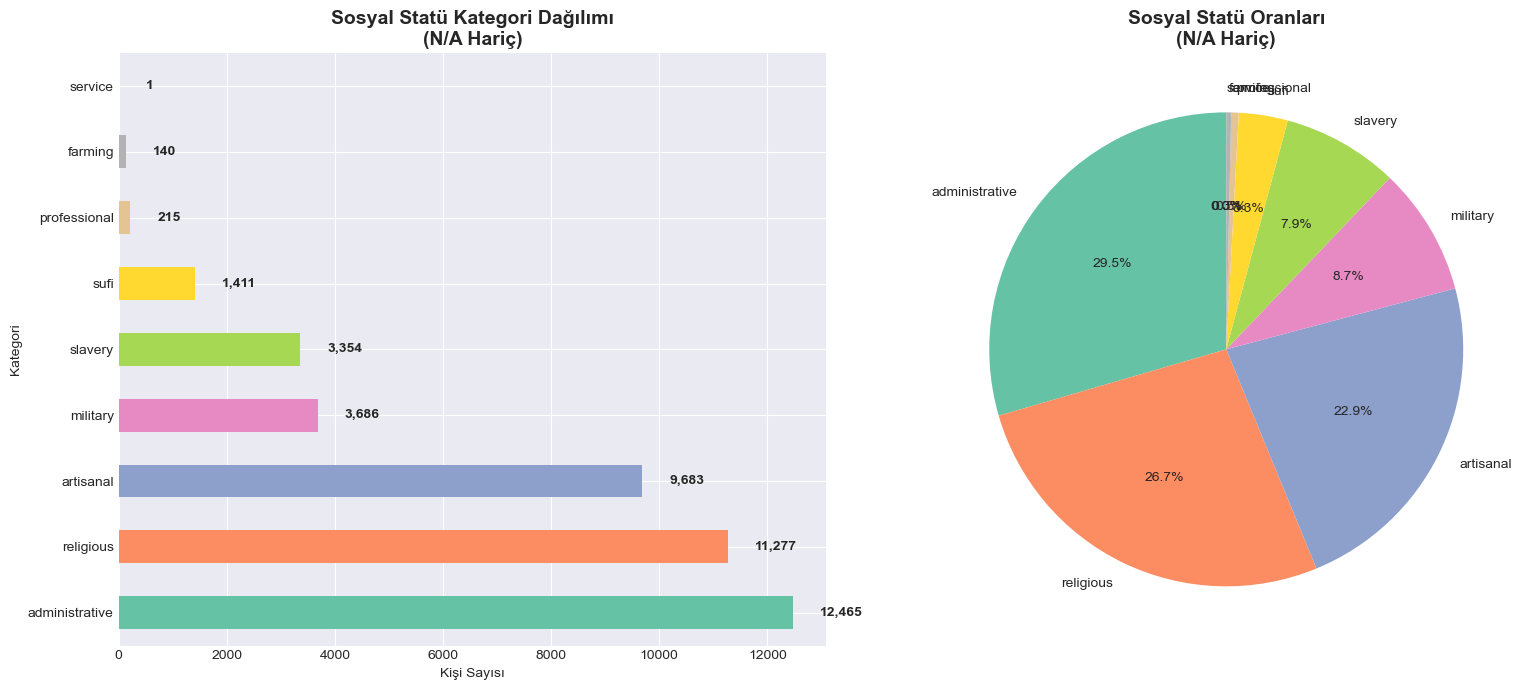

In [141]:
# Get category counts
category_counts = persons_df['cleaned_social_status'].value_counts()
category_pct = (category_counts / len(persons_df) * 100).round(2)

print(f"\nToplam kişi sayısı: {len(persons_df):,}")
print(f"Benzersiz kategori sayısı: {persons_df['cleaned_social_status'].nunique()}")

print("\n" + "=" * 80)
print("KATEGORİ DAĞILIMI")
print("=" * 80)

for i, (category, count) in enumerate(category_counts.items(), 1):
    pct = category_pct[category]
    print(f"{i:2d}. {category:20s}: {count:>8,} ({pct:>6.2f}%)")

# Calculate N/A statistics
na_count = (persons_df['cleaned_social_status'] == 'N/A').sum()
specified_count = len(persons_df) - na_count
specification_rate = (specified_count / len(persons_df) * 100).round(2)

print(f"\nBelirtilmemiş (N/A): {na_count:,} ({100-specification_rate:.2f}%)")
print(f"Belirtilmiş: {specified_count:,} ({specification_rate}%)")

# ============================================================================
# VISUALIZATION 1: Overall Distribution
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Exclude N/A for better visualization
categories_no_na = category_counts[category_counts.index != 'N/A']

# Bar chart
colors = sns.color_palette("Set2", len(categories_no_na))
categories_no_na.plot(kind='barh', ax=axes[0], color=colors)
axes[0].set_title('Sosyal Statü Kategori Dağılımı\n(N/A Hariç)', 
                  fontsize=14, fontweight='bold')
axes[0].set_xlabel('Kişi Sayısı')
axes[0].set_ylabel('Kategori')

for i, v in enumerate(categories_no_na):
    axes[0].text(v + 500, i, f'{v:,}', va='center', fontweight='bold')

# Pie chart
axes[1].pie(categories_no_na, labels=categories_no_na.index, autopct='%1.1f%%', 
            startangle=90, colors=colors)
axes[1].set_title('Sosyal Statü Oranları\n(N/A Hariç)', 
                  fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [143]:
persons_specified = persons_df[persons_df['cleaned_social_status'] != 'N/A'].copy()



En yaygın 5 din/etnisite grubu için kategori dağılımı:
religion_ethnicity     Armenian  European  Greek  Muslim  Russian
cleaned_social_status                                            
administrative               11       110     63   12117        0
artisanal                   630        65   1416    6737       12
farming                       5         0     61      55        0
military                      0        22     12    3592        0
professional                  0         0      1     214        0
religious                    32         0    233   10957        0
service                       0         0      0       1        0
slavery                       6       414     19     795     1095
sufi                          0         0      2    1408        0


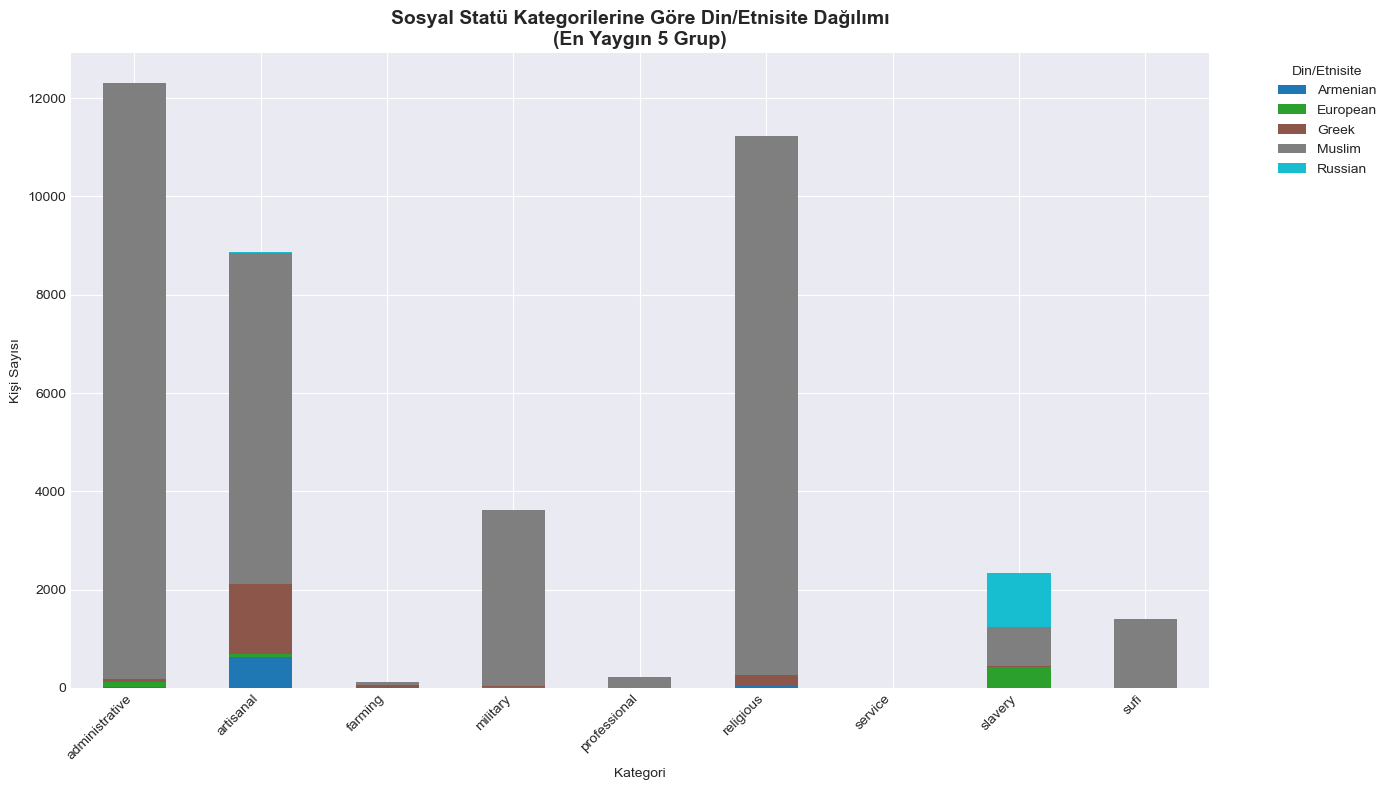

In [144]:
# Top 5 religions
top_religions = persons_specified['religion_ethnicity'].value_counts().head(5).index
persons_top_religions = persons_specified[
    persons_specified['religion_ethnicity'].isin(top_religions)
]

# Crosstab
religion_category = pd.crosstab(
    persons_top_religions['cleaned_social_status'],
    persons_top_religions['religion_ethnicity']
)

print("\nEn yaygın 5 din/etnisite grubu için kategori dağılımı:")
print(religion_category)

# Visualization - Stacked bar
fig, ax = plt.subplots(figsize=(14, 8))

religion_category.plot(kind='bar', stacked=True, ax=ax, colormap='tab10')
ax.set_title('Sosyal Statü Kategorilerine Göre Din/Etnisite Dağılımı\n(En Yaygın 5 Grup)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Kategori')
ax.set_ylabel('Kişi Sayısı')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(title='Din/Etnisite', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## Sufilerin Demografik Analizi

In [146]:
# Filter persons
persons_df = combined_df[
    (combined_df['person_id'].notna()) & 
    (combined_df['person_id'] != 'N/A') &
    (combined_df['name'] != 'N/A')
].copy()

# Identify Sufis
sufis_df = persons_df[persons_df['cleaned_social_status'] == 'sufi'].copy()

print(f"\nToplam kişi sayısı: {len(persons_df):,}")
print(f"Sufi olarak tanımlanan kişi: {len(sufis_df):,}")
print(f"Sufi oranı: %{len(sufis_df)/len(persons_df)*100:.2f}")


Toplam kişi sayısı: 256,270
Sufi olarak tanımlanan kişi: 1,411
Sufi oranı: %0.55


In [145]:
# Filter persons
persons_df = combined_df[
    (combined_df['person_id'].notna()) & 
    (combined_df['person_id'] != 'N/A') &
    (combined_df['name'] != 'N/A')
].copy()

# Identify Sufis
sufis_df = persons_df[persons_df['cleaned_social_status'] == 'sufi'].copy()

print(f"\nToplam kişi sayısı: {len(persons_df):,}")
print(f"Sufi olarak tanımlanan kişi: {len(sufis_df):,}")
print(f"Sufi oranı: %{len(sufis_df)/len(persons_df)*100:.2f}")


Toplam kişi sayısı: 256,270
Sufi olarak tanımlanan kişi: 1,411
Sufi oranı: %0.55


In [148]:
print("\nCinsiyet Dağılımı:")
gender_dist = sufis_df['gender'].value_counts()
for gender, count in gender_dist.items():
    pct = (count / len(sufis_df) * 100)
    print(f"  {gender}: {count:,} ({pct}%)")



Cinsiyet Dağılımı:
  Man: 1,411 (100.0%)


In [158]:
# Parse titles
all_titles = []
for titles_str in sufis_df['titles']:
    if pd.notna(titles_str) and titles_str != 'N/A' and titles_str != '[]':
        try:
            titles = ast.literal_eval(titles_str)
            if isinstance(titles, list):
                all_titles.extend([t.lower().strip() for t in titles])
        except:
            pass

title_counts = Counter(all_titles)

print(f"\nToplam unvan kaydı: {len(all_titles)}")
print(f"Benzersiz unvan: {len(title_counts)}")
print(f"\nEn yaygın 30 Sufi unvanı:")

for i, (title, count) in enumerate(title_counts.most_common(30), 1):
    pct = (count / len(all_titles) * 100)
    print(f"{i:2d}. {title:30s}: {count:>5,} ({pct:>5.2f}%)")


Toplam unvan kaydı: 1913
Benzersiz unvan: 116

En yaygın 30 Sufi unvanı:
 1. şeyh                          :   404 (21.12%)
 2. derviş                        :   342 (17.88%)
 3. dede                          :   338 (17.67%)
 4. efendi                        :   233 (12.18%)
 5. çelebi                        :   128 ( 6.69%)
 6. eş-şeyh                       :   116 ( 6.06%)
 7. baba                          :    59 ( 3.08%)
 8. halîfe                        :    38 ( 1.99%)
 9. es-seyyid                     :    21 ( 1.10%)
10. sûfî                          :    14 ( 0.73%)
11. el-hâc                        :    14 ( 0.73%)
12. el-müezzin                    :    11 ( 0.58%)
13. mevlânâ                       :    10 ( 0.52%)
14. umdetü’s-sâlikîn              :     9 ( 0.47%)
15. el-i̇mâm                      :     6 ( 0.31%)
16. seyyid                        :     6 ( 0.31%)
17. sûfi                          :     6 ( 0.31%)
18. el-halvetî                    :     6 ( 0.31%)
19. fahr

In [162]:

print("\n" + "=" * 80)
print("SUFİLERLE İLİŞKİLİ YERLER")
print("=" * 80)

# Get all rows related to Sufi cases
sufi_case_ids = sufis_df['case_unique_id'].unique()
sufi_related_places = combined_df[
    (combined_df['case_unique_id'].isin(sufi_case_ids)) &
    (combined_df['place_name'].notna()) &
    (combined_df['place_name'] != 'N/A')
]

print(f"\nSufi davalarıyla ilişkili yer kaydı: {len(sufi_related_places):,}")

# Place types
print("\nYer türleri:")
place_type_dist = sufi_related_places['place_type'].value_counts()
for place_type, count in place_type_dist.head(15).items():
    pct = (count / len(sufi_related_places) * 100)
    print(f"  {place_type}: {count:,} ({pct}%)")

# Most common places
print("\nEn sık geçen 20 yer:")
place_dist = sufi_related_places['place_name'].value_counts().head(20)
for i, (place, count) in enumerate(place_dist.items(), 1):
    print(f"{i:2d}. {place}: {count:,}")


SUFİLERLE İLİŞKİLİ YERLER

Sufi davalarıyla ilişkili yer kaydı: 3,109

Yer türleri:
  Neighborhood: 828 (26.632357671276942%)
  City: 814 (26.182052106786745%)
  Region: 353 (11.354133161788356%)
  Village: 122 (3.9240913477002253%)
  Mosque: 100 (3.21646831778707%)
  city: 89 (2.862656802830492%)
  neighborhood: 64 (2.0585397233837246%)
  Town: 60 (1.9298809906722418%)
  region: 59 (1.8977163074943713%)
  village: 46 (1.4795754261820522%)
  Zaviye: 42 (1.3509166934705692%)
  Sufi-specific place: 32 (1.0292698616918623%)
  Kasaba: 31 (0.9971051785139916%)
  District: 22 (0.7076230299131554%)
  Waqf: 21 (0.6754583467352846%)

En sık geçen 20 yer:
 1. İstanbul: 165
 2. Mahmiye-i İstanbul: 159
 3. Kostantıniyye: 103
 4. Galata: 87
 5. Üsküdar: 44
 6. Medîne-i Hazret-i Ebâ Eyyûb el-Ensârî: 41
 7. Medîne-i Münevvere: 32
 8. Mahmiye-i Galata: 28
 9. Beşiktaş: 27
10. Mahmiye-i Kostantıniyye: 27
11. Kasımpaşa: 24
12. Medîne-i Hazret-i Ebâ Eyyûb-i Ensârî: 22
13. Medîne-i Hazret-i Ebî Eyyûb el-

In [163]:
# Sufi-specific places
sufi_place_keywords = ['tekke', 'dergah', 'zaviye', 'hankah', 'asitane', 'türbe']
sufi_places = sufi_related_places[
    sufi_related_places['place_type'].str.lower().str.contains('|'.join(sufi_place_keywords), na=False) |
    sufi_related_places['place_name'].str.lower().str.contains('|'.join(sufi_place_keywords), na=False)
]

print(f"\nSufi mekanları (tekke, dergah, vb.): {len(sufi_places):,}")
if len(sufi_places) > 0:
    print("\nEn yaygın Sufi mekanları:")
    for i, (place, count) in enumerate(sufi_places['place_name'].value_counts().head(20).items(), 1):
        print(f"{i:2d}. {place}: {count:,}")


Sufi mekanları (tekke, dergah, vb.): 66

En yaygın Sufi mekanları:
 1. Kurşunlu Türbe: 3
 2. İlyas Dede Zâviyesi: 3
 3. Şeyh Sinan Erdebilî Zâviyesi: 2
 4. Şehzâdegân zâviyesi: 2
 5. Emir Buhârî Zâviyesi: 2
 6. Sadeddin Efendi Zâviyesi: 2
 7. Ali Baba Zaviyesi: 2
 8. Hüseyin Paşa Zaviyesi: 1
 9. Alâaddin Halîfe Zâviyesi: 1
10. Zâviye-i cedîde: 1
11. Nahılbend Hasan Çelebi Zâviyesi: 1
12. Nakşibendî zâviyesi: 1
13. Seyyid Pîrî Tekkesi: 1
14. Baba Geylânî Zâviyesi: 1
15. Ümmî Sinan zâviyesi: 1
16. Şeyh Süleyman Halife zâviyesi: 1
17. Şeyh Eyüb Efendi Zâviyesi: 1
18. Kapudan Sinan Paşa Zâviyesi: 1
19. Gazi Hasan Paşa zâviyesi: 1
20. Kâtib Muslihiddin Zâviyesi: 1


In [165]:
print("\n" + "=" * 80)
print("SUFİLERİN KARIŞTIĞI DAVA TÜRLERİ")
print("=" * 80)

# Get legal case types for Sufi cases
sufi_cases = combined_df[
    (combined_df['case_unique_id'].isin(sufi_case_ids)) &
    (combined_df['legal_case_type'].notna()) &
    (combined_df['legal_case_type'] != 'N/A')
]

print(f"\nSufilerin karıştığı toplam dava: {len(sufi_case_ids):,}")

case_type_dist = sufi_cases['legal_case_type'].value_counts()
print(f"\nFarklı dava türü: {len(case_type_dist)}")
print(f"\nEn yaygın 20 dava türü:")

for i, (case_type, count) in enumerate(case_type_dist.head(20).items(), 1):
    pct = (count / len(sufi_cases) * 100)
    print(f"{i:2d}. {case_type:50s}: {count:>5,} ({pct:>5.2f}%)")

# Case results
print("\nDava sonuçları:")
result_dist = sufi_cases[sufi_cases['case_result'] != 'N/A']['case_result'].value_counts()
for result, count in result_dist.head(10).items():
    print(f"  {result}: {count:,}")



SUFİLERİN KARIŞTIĞI DAVA TÜRLERİ

Sufilerin karıştığı toplam dava: 1,023

Farklı dava türü: 21

En yaygın 20 dava türü:
 1. Property Disputes                                 :   325 (31.16%)
 2. Religious Endowments (Waqf)                       :   204 (19.56%)
 3. Inheritance Cases                                 :   156 (14.96%)
 4. Debt/Loan Agreements                              :   153 (14.67%)
 5. Slavery and Manumission                           :    65 ( 6.23%)
 6. Criminal Cases                                    :    60 ( 5.75%)
 7. Marital Disputes                                  :    28 ( 2.68%)
 8. Trade Disputes                                    :    20 ( 1.92%)
 9. Appointments                                      :    10 ( 0.96%)
10. Taxation Disputes                                 :     4 ( 0.38%)
11. Settlement                                        :     3 ( 0.29%)
12. Pilgrimage Arrangements                           :     3 ( 0.29%)
13. Employment Disputes    

In [171]:
print("\n" + "=" * 80)
print("ZAMANSAL ANALİZ - SUFİ DAVALARI")
print("=" * 80)

sufi_dates = combined_df[
    (combined_df['case_unique_id'].isin(sufi_case_ids)) &
    (combined_df['date'].notna()) &
    (combined_df['date'] != 'N/A')
]

print(f"\nSufi davalarında tarih kaydı: {len(sufi_dates):,}")

# Most common dates
print("\nEn sık geçen 20 tarih:")
date_dist = sufi_dates['date'].value_counts().head(20)
for i, (date, count) in enumerate(date_dist.items(), 1):
    print(f"{i:2d}. {date}: {count:,}")

print("\n" + "=" * 80)


ZAMANSAL ANALİZ - SUFİ DAVALARI

Sufi davalarında tarih kaydı: 2,011

En sık geçen 20 tarih:
 1. July 1633: 22
 2. Zilhicce 1043: 21
 3. July 1662: 20
 4. June 1634: 20
 5. Muharrem 1043: 20
 6. March 1667: 17
 7. July 1657: 13
 8. June 1662: 13
 9. July 1644: 12
10. March 1638: 10
11. May 1624: 10
12. October 1637: 10
13. August 1657: 10
14. March 1671: 10
15. Zilka‘de 1081: 9
16. Şevval 1067: 9
17. September 1563: 9
18. May 1662: 9
19. March 1691: 9
20. September 1657: 9



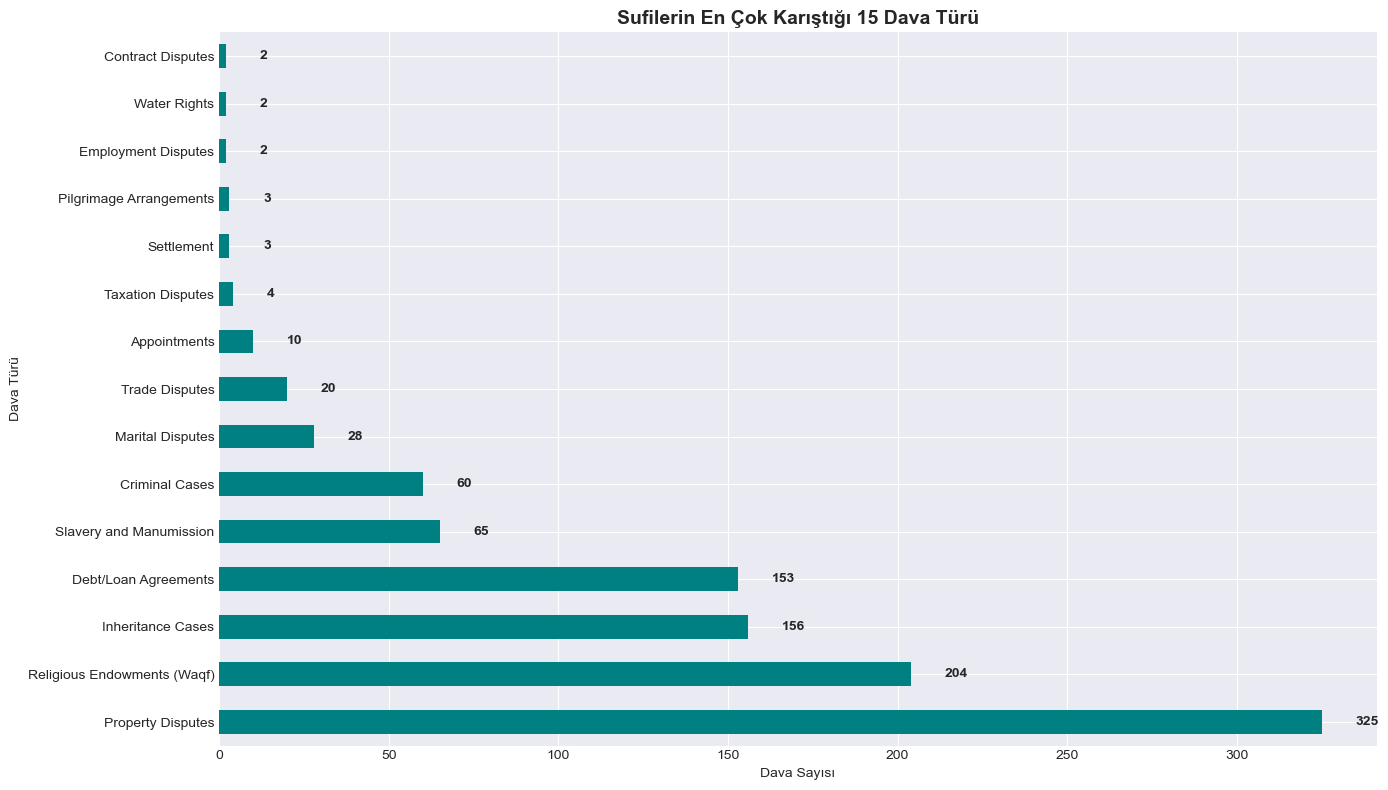

In [173]:
fig, ax = plt.subplots(figsize=(14, 8))

top_case_types = case_type_dist.head(15)
top_case_types.plot(kind='barh', ax=ax, color='teal')
ax.set_title('Sufilerin En Çok Karıştığı 15 Dava Türü', fontsize=14, fontweight='bold')
ax.set_xlabel('Dava Sayısı')
ax.set_ylabel('Dava Türü')

for i, v in enumerate(top_case_types):
    ax.text(v + 10, i, f'{v:,}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

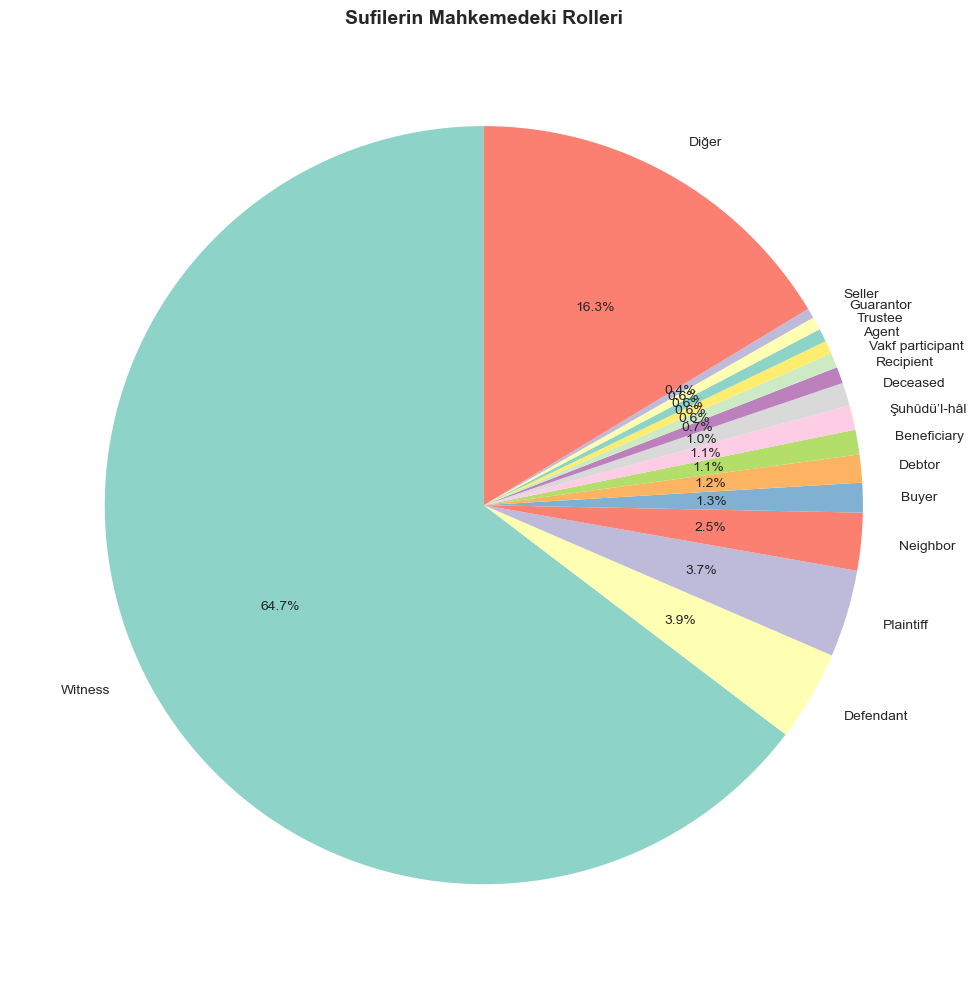

In [179]:
# Role Distribution - Pie Chart (Top 6 roles + Others)
fig, ax = plt.subplots(figsize=(10, 10))

top_roles = role_counts.head(15)
others = role_counts[5:].sum()

if others > 0:
    plot_data = pd.concat([top_roles, pd.Series({'Diğer': others})])
else:
    plot_data = top_roles

plot_data.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90,
               colors=sns.color_palette("Set3", len(plot_data)))
ax.set_title('Sufilerin Mahkemedeki Rolleri', fontsize=14, fontweight='bold')
ax.set_ylabel('')

plt.tight_layout()
plt.show()